# Evaluate Embeddings (Intrinsic) 
Copyright (C) 2021 ServiceNow, Inc.

This notebook contains code for running and visualizing geology-specific evaluation of word embeddings for an individual model.  

It will output the following files, where {MODEL_NAME} is replaced by the model name you give your model (below) and is usually dependent on the model that you load. 

* analogy_summary_{MODEL_NAME}.csv: analogy results on every test
* analogy_summary_per_theme_{MODEL_NAME}.csv: analogy results averaged across themes
* relatedness_{MODEL_NAME}.csv
* relatedness_summary_per_type_theme_{MODEL_NAME}.csv: relatedness scores for each type of test and theme
* relatedness_summary_type_{MODEL_NAME}.csv: relatedness scores for each type of test
* relatedness_summary_theme_{MODEL_NAME}.csv: relatedness scores for each theme
* {MODEL_NAME}_nn.csv: nearest neighbor results
* clustering_tests_{MODEL_NAME}.csv: the words in the clustering tests and whether or not they're in the vocab 
* clustering_merged_{MODEL_NAME}.csv: clustering results such that every pair of clusters is represented as A-B and B-A 
* clustering_{MODEL_NAME}.csv: clustering results (prefer to use the merged version above)

In [2]:
import pathlib
REPO_DIR = pathlib.Path(__name__).parent.absolute().parent.parent
print(REPO_DIR)

/nrcan_p2/workspace/sraimondo/nrcan_p2_5


In [2]:
import sys
sys.path.append(str(REPO_DIR))

Define your output folder. This is where the ouput .csvs will be saved. 

In [3]:
OUTPUT_FOLDER = '/nrcan_p2/data/07_model_output/glove_geology_evaluation/'

In [4]:
%load_ext autoreload
%autoreload 2

## Load the test data...
The evaluation test set is provided in the NRCan repo in `/nrcan_p2/evaluation/`. 

In [5]:
from nrcan_p2.evaluation.load_test_data import (
    load_analogy_data, load_similarity_data, load_nearest_neighbour_data, load_word_cluster_data)

In [6]:
analogy_tests = load_analogy_data(REPO_DIR / 'nrcan_p2/evaluation/2020_ElementAI_Test_CJML_02_Dec-16-2020 - Analogy.csv')
display(analogy_tests)

Analogy data contains: 66 analogies in 9 themes


,Task,Theme,a,x,b,y
0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran
1,Analogy,Geology,Core,Mantle,Phenocryst,Rim
2,Analogy,Geology,Core,Inner,Crust,Outer
3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism
4,Analogy,Geology,Diverging,Ridge,Converging,Mountain
...,...,...,...,...,...,...
61,Analogy,Geology_Petrology_Sedimentary,Turbidite,Marine,Sandstone,Fluvial
62,Analogy,Geology_Structural,Gouge,Unconsolidated,Cataclasite,Consolidated
63,Analogy,Geology_Structural,Norma,Extension,Reverse,Compression
64,Analogy,Geology_Structural,Plunge,Lineation,Strike,Planar


In [7]:
analogy_tests.Theme.value_counts()

Geology                          18
Geology_Mineralogy               11
Geology_Petrology_Metamorphic     9
Geology_Petrology_Igneous         9
Geology_Petrology_Sedimentary     8
Geology_Metallogeny               4
Geology_Structural                4
Geology_Geochronology             2
Geology_Hazards                   1
Name: Theme, dtype: int64

In [8]:
relatedness_tests = load_similarity_data(REPO_DIR / 'nrcan_p2/evaluation/2020_ElementAI_Test_CJML_03_Feb-23-2020-Relatedness.csv')
display(relatedness_tests)

Relatedness data contains: 249 relatedness examples in 14 themes


,Task,Theme,Include synonym,Spelling variation,y,a,x (Words with decreasing similarity ->),Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,l
0,Relatedness,Earth System Science,No,NaN,NaN,Age,Uncertainty,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Age, Uncertainty]"
1,Relatedness,Earth System Science,No,NaN,NaN,Air,Stratosphere,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Air, Stratosphere]"
2,Relatedness,Earth System Science,No,NaN,NaN,Alkali,Potassium,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Alkali, Potassium]"
3,Relatedness,Earth System Science,No,NaN,NaN,Alpine,Mountain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Alpine, Mountain]"
4,Relatedness,Earth System Science,No,NaN,NaN,Atom,Nucleus,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Atom, Nucleus]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Relatedness,Methods,No,NaN,NaN,Magnetic,Susceptibility,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Magnetic, Susceptibility]"
245,Relatedness,Methods,No,NaN,NaN,Plasma,Laser,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Plasma, Laser]"
246,Relatedness,Methods,No,NaN,NaN,Reference,Standard,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Reference, Standard]"
247,Relatedness,Methods,No,NaN,NaN,Seismic,Wave,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Seismic, Wave]"


In [9]:
nn_tests = load_nearest_neighbour_data(REPO_DIR / 'nrcan_p2/evaluation/2020_ElementAI_Test_CJML_03_Jan-4-2020-NearestNeighbours.csv')
display(nn_tests)

Nearest neighbor data contains: 5 words


,ID,Word
0,1,Earth
1,2,Exploration
2,3,Environment
3,4,Climate
4,5,Hazard


In [10]:
cluster_tests = load_word_cluster_data(REPO_DIR / 'nrcan_p2/evaluation/2020_ElementAI_Test_CJML_03_Jan-4-2020-WordClusters.csv')
display(cluster_tests)

Word cluster data contains: 16 clusters and 900 total words


,Cluster,Word
0,Alteration types,argillic
1,Alteration types,albitic
2,Alteration types,alunitic
3,Alteration types,calcsilicate
4,Alteration types,carbonate
...,...,...
895,Exploration activity,sampling
896,Exploration activity,subsurface
897,Exploration activity,surface
898,Exploration activity,systematic


## Load embeddings...

You have three options: 

1) Change this directory to point to your downloaded glove models. This notebook saves output files which are named according to the dataset, pipeline, and dimension of the model. You'll have to define these yourself for your model.

In [11]:
#GLOVE_MODEL_DIR = '/nrcan_p2/data/06_models/glove_pretrained'
#GLOVE_MODEL_DIR = '/nrcan_p2/data/06_models/glove/dataset_A_full_02-23-2021-02-49-19'
#name='dA_full_dB_dD'
#dataset='A full + B + D'
#pipeline='PLUS'
#dim=300

2) Or create a GLOVE_MODEL_MAP.csv which lists the model locations. We expect this to be in the OUPUT_FOLDER you defined above.

Must have the following columns: 'dataset', 'pipeline', 'dim', 'path'

In [11]:
import pandas as pd
MODEL_MAP = pd.read_csv(f'{OUTPUT_FOLDER}/GLOVE_MODEL_MAP.csv')
MODEL_MAP

pipeline = 'PLUS'
dataset = 'A full + B + D'
name = 'dA_full_dB_dD'
dim = 300

model_row = MODEL_MAP[(MODEL_MAP.dataset == dataset) & (MODEL_MAP.pipeline == pipeline) & 
                      (MODEL_MAP.dim == dim)]
GLOVE_MODEL_DIR = model_row.path.values[0]
print(GLOVE_MODEL_DIR)


/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-25-2021-01-56-02


3) Or if you want to use a pretrained model instead...

In [ ]:
# pipeline='50d'
# name='6B'
# GLOVE_MODEL_DIR='/nrcan_p2/data/06_models/glove_pretrained'

We'll give your model a name (for saving output)

In [12]:
if dim == 300:
    MODEL_NAME = f'glove.{name}.{pipeline}.{dim}'
else:
    MODEL_NAME = f'glove.{name}.{pipeline}' 
MODEL_NAME

'glove.dA_full_dB_dD.PLUS.300'

Gensim operates on "word2vec" format models. So we'll need to convert our glove model to word2vec format

In [13]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# If we're loading a pretrained model, the name of the vector file is different
if name == '6B':
    glove_file = datapath(f'{GLOVE_MODEL_DIR}/glove.6B.50d.txt') 
else:
    glove_file = datapath(f'{GLOVE_MODEL_DIR}/vectors.txt')

# This is a big slow. You might consider saving a permanent file instead of a temporary one.
tmp_file = get_tmpfile(f"{GLOVE_MODEL_DIR}/test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

In [14]:
model

## Evaluate analogies

The analogy task asks, "X is to A as Y is to what?" (Say the correct answer is B.) It tests whether relationships are preserved across embedding space and enables meaningful vector composition (arithmetic). 

E.g. "King is to man as Queen is to woman" or "Abitibi is to Superior as Stikinia is to Cordilleran"

If this kind of composition holds then, we should be able to take the representation of words X, Y, A and B in vector space `x`, `a`, `y` and `b` and we expect that `a + y - x = b`. But ideally, all four of the following equations should hold:
* `a + y - x = b`
* `a + y - b = x`
* `x + b - a = y`
* `x + b - y = a`

Let's call the actual result of the arithmetic (e.g. `a + y - x`) `p`. Now, is it really true that B is *perfectly analogous*? Do King and Queen have *exactly* the same relationship to man and woman. No. But even if we don't get linguistically philosophical, it is unlikely that `p` exactly equals the vector `b`. 

Given this, in order to evaluate analogies we have two options. We can ask:
1) Which word in embedding space is closest to `p`? Is it `B`'s vector `b`? 
2) How far away is `p` from the correct answer `b`?

The first provides a clean yes/no answer. However, we should give our model some margin for error. For example, it is possible that `p` is closest to the word `running` instead of `run` or `sprint` instead of `run`. So instead we should ask: Is `B` in the top 5, 10, etc. closest words? or What is the rank of `B`?

The second question is somewhat more difficult to evaluate. How much worse is a distance of e.g. 10 than a distance of 20? This is important if the density of words is different across the embedding space.

In [16]:
from nrcan_p2.evaluation.analogies import evaluate_all_analogies, analogy_predict, analogy_distance

In [17]:
analogy_predict(model, ('king', 'man', 'queen', 'woman'), i=3) 

,word,similarity
0,inside,0.372854
1,killed,0.369144
2,indians,0.365923
3,men,0.360356
4,charlotte,0.356819
5,use,0.347760
6,protect,0.341238
7,people,0.339113
8,natural,0.333213
9,canadian,0.331260


### Evaluate all of the analogies

We test all four permutations of the analogy (i.e. try to predict a, b, x, and y).  

By default, we test whether the correct answer is in the top1, top5, top10, top100, top1000. 

We also calculate the rank of the correct answer and the distance of the resulting vector to the vector of the correct word. Note that the rank will be NaN if the word is not in the max topK (or top 100 if topK is less than 100) that was tested.

We also calculate the average of the above across all permutations. 

Note that if *any* word is missing in the quartet, the distance calculation will fail. If a given word is missing from the vocabulary, it's topN will be NaN.

In [17]:
res_df = evaluate_all_analogies(model, analogy_tests, topns=[1,5,10,100,1000])

In [18]:
res_df

,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,top100_word-a,...,rank_word-y,distance_word-y,in_vocab-y,avg_top1,avg_top5,avg_top10,avg_top100,avg_top1000,avg_rank,avg_distance
0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran,0.0,0.0,0.0,1.0,...,24.0,0.714083,1,0.00,0.00,0.25,0.75,1.00,180.25,0.725739
1,Analogy,Geology,Core,Mantle,Phenocryst,Rim,0.0,0.0,0.0,0.0,...,NaN,0.932627,1,0.00,0.00,0.00,0.00,0.25,847.00,0.878892
2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,0.0,...,2.0,0.533110,1,0.25,0.50,0.50,0.50,0.50,1.50,0.631648
3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,1.0,1.0,1.0,1.0,...,26.0,0.594168,1,0.50,0.50,0.50,1.00,1.00,23.50,0.497447
4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,1.0,1.0,1.0,1.0,...,15.0,0.569261,1,0.25,0.75,0.75,1.00,1.00,5.25,0.579705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Analogy,Geology_Petrology_Sedimentary,Turbidite,Marine,Sandstone,Fluvial,0.0,0.0,0.0,0.0,...,285.0,0.619385,1,0.00,0.00,0.00,0.00,0.50,331.00,0.770319
62,Analogy,Geology_Structural,Gouge,Unconsolidated,Cataclasite,Consolidated,0.0,0.0,1.0,1.0,...,244.0,0.778683,1,0.00,0.00,0.25,0.75,1.00,76.00,0.700947
63,Analogy,Geology_Structural,Norma,Extension,Reverse,Compression,0.0,0.0,0.0,0.0,...,34.0,0.513915,1,0.00,0.00,0.00,0.25,0.25,34.00,0.783191
64,Analogy,Geology_Structural,Plunge,Lineation,Strike,Planar,0.0,1.0,1.0,1.0,...,192.0,0.624875,1,0.25,0.50,0.50,0.75,1.00,70.50,0.535395


#### Coverage

Not all words may be present in our model's vocabulary. Let's check how many. Note that NaNs are ignored in the averaging calculations.

In [19]:
# calculate the number of missing words 
res_df['n_present'] = res_df.filter(regex='in_vocab-').sum(axis=1)
res_df['perc_present'] = res_df.filter(regex='in_vocab-').sum(axis=1)/4.0

In [20]:
print(f'The average number of words per analogy that are in the vocab: {res_df.n_present.mean()}')

The average number of words per analogy that are in the vocab: 3.9545454545454546


In [22]:
res_df.to_csv(f'{OUTPUT_FOLDER}/analogy_summary_{MODEL_NAME}.csv')

#### Summarize results by Theme

Note that perc_present is the average of the average number of words per quartet. 

In [21]:
res_df.groupby('Theme').mean()

,top1_word-a,top5_word-a,top10_word-a,top100_word-a,top1000_word-a,rank_word-a,distance_word-a,in_vocab-a,top1_word-x,top5_word-x,...,in_vocab-y,avg_top1,avg_top5,avg_top10,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present
Theme,,,,,,,,,,,,,,,,,,,,,
Geology,0.111111,0.222222,0.444444,0.722222,0.833333,78.466667,0.650393,1.000000,0.277778,0.611111,...,1.0,0.125000,0.347222,0.458333,0.666667,0.875000,148.352941,0.628400,4.000000,1.000000
Geology_Geochronology,0.000000,0.000000,0.500000,0.500000,0.500000,6.000000,0.702009,1.000000,0.500000,0.500000,...,1.0,0.125000,0.250000,0.375000,0.500000,0.500000,7.250000,0.679980,4.000000,1.000000
Geology_Hazards,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000,0.636606,1.000000,0.000000,1.000000,...,1.0,0.000000,0.250000,0.500000,1.000000,1.000000,24.500000,0.618263,4.000000,1.000000
Geology_Metallogeny,0.333333,0.666667,0.666667,0.666667,1.000000,42.666667,0.519057,1.000000,0.333333,0.666667,...,1.0,0.333333,0.666667,0.833333,0.916667,1.000000,15.000000,0.482616,3.750000,0.937500
Geology_Mineralogy,0.100000,0.300000,0.600000,0.900000,0.900000,15.888889,0.533840,1.000000,0.100000,0.400000,...,1.0,0.175000,0.450000,0.650000,0.800000,0.925000,77.041667,0.542813,3.909091,0.977273
Geology_Petrology_Igneous,0.375000,0.500000,0.500000,0.750000,0.750000,7.500000,0.499356,0.888889,0.375000,0.750000,...,1.0,0.375000,0.625000,0.718750,0.843750,0.875000,48.854167,0.479952,3.888889,0.972222
Geology_Petrology_Metamorphic,0.333333,0.666667,0.777778,0.888889,0.888889,8.625000,0.493389,1.000000,0.444444,0.777778,...,1.0,0.361111,0.666667,0.722222,0.916667,0.972222,30.601852,0.483386,4.000000,1.000000
Geology_Petrology_Sedimentary,0.125000,0.625000,0.625000,0.750000,0.750000,14.666667,0.524512,1.000000,0.000000,0.000000,...,1.0,0.062500,0.312500,0.343750,0.562500,0.812500,130.964286,0.610694,4.000000,1.000000
Geology_Structural,0.000000,0.250000,0.500000,0.500000,0.750000,333.333333,0.690328,1.000000,0.250000,0.250000,...,1.0,0.062500,0.125000,0.187500,0.500000,0.750000,177.875000,0.688737,4.000000,1.000000


In [22]:
res_df.groupby('Theme').mean().filter(regex=r'avg|present').to_csv(f'{OUTPUT_FOLDER}/analogy_summary_per_theme_{MODEL_NAME}.csv')
res_df.groupby('Theme').mean().filter(regex=r'avg|present')

,avg_top1,avg_top5,avg_top10,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present
Theme,,,,,,,,,
Geology,0.125000,0.347222,0.458333,0.666667,0.875000,148.352941,0.628400,4.000000,1.000000
Geology_Geochronology,0.125000,0.250000,0.375000,0.500000,0.500000,7.250000,0.679980,4.000000,1.000000
Geology_Hazards,0.000000,0.250000,0.500000,1.000000,1.000000,24.500000,0.618263,4.000000,1.000000
Geology_Metallogeny,0.333333,0.666667,0.833333,0.916667,1.000000,15.000000,0.482616,3.750000,0.937500
Geology_Mineralogy,0.175000,0.450000,0.650000,0.800000,0.925000,77.041667,0.542813,3.909091,0.977273
Geology_Petrology_Igneous,0.375000,0.625000,0.718750,0.843750,0.875000,48.854167,0.479952,3.888889,0.972222
Geology_Petrology_Metamorphic,0.361111,0.666667,0.722222,0.916667,0.972222,30.601852,0.483386,4.000000,1.000000
Geology_Petrology_Sedimentary,0.062500,0.312500,0.343750,0.562500,0.812500,130.964286,0.610694,4.000000,1.000000
Geology_Structural,0.062500,0.125000,0.187500,0.500000,0.750000,177.875000,0.688737,4.000000,1.000000


#### Visualize the distribution of the results

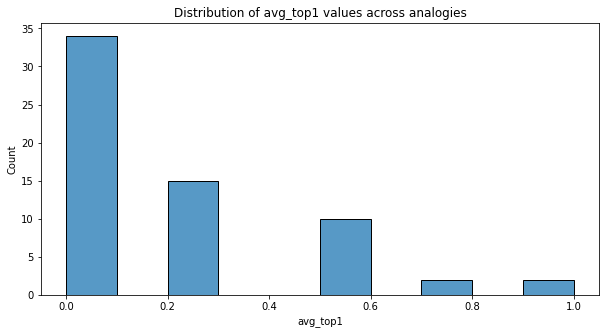

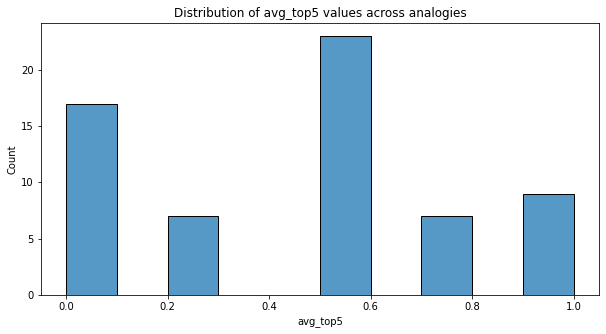

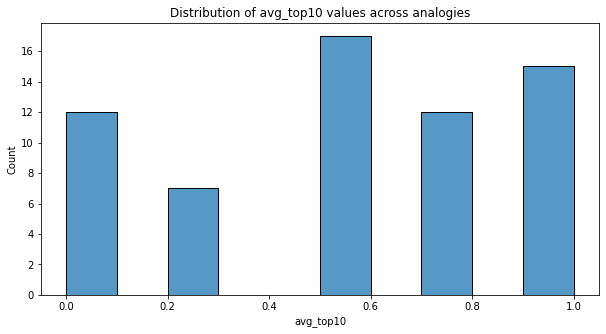

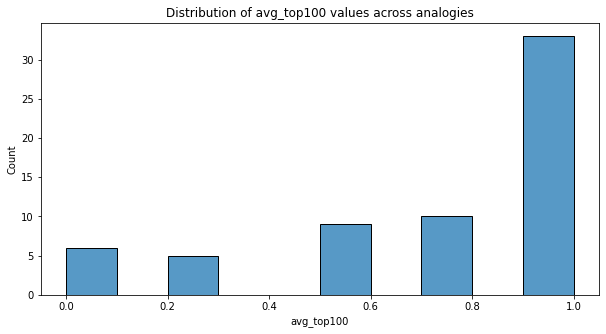

In [25]:
for i in [1,5,10,100]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    column = f'avg_top{i}'
    plt.figure(figsize=(10,5))
    sns.histplot(data=res_df.reset_index(), x=column, multiple='dodge', bins=10)
    plt.title(f'Distribution of {column} values across analogies')

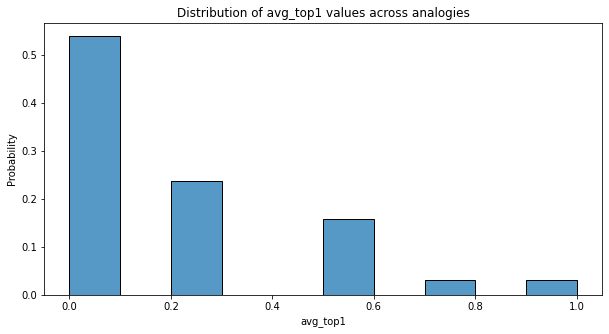

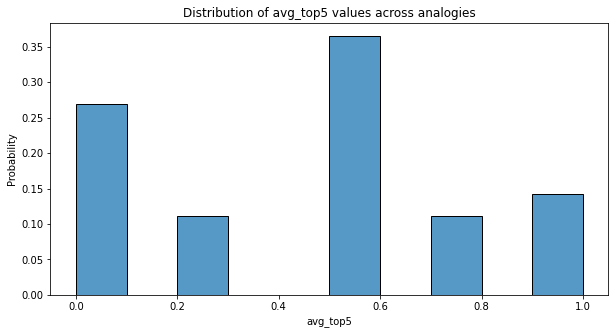

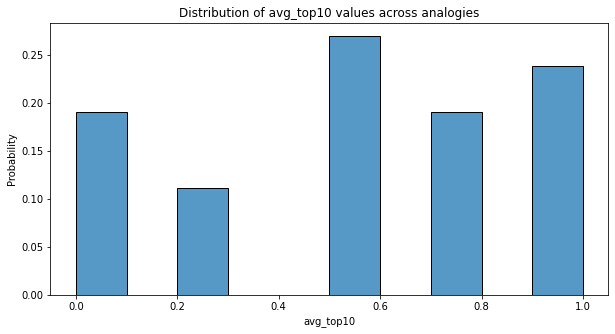

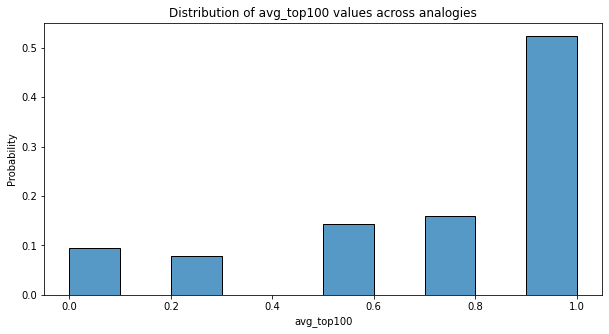

In [26]:
for i in [1,5,10,100]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    column = f'avg_top{i}'
    plt.figure(figsize=(10,5))
    sns.histplot(data=res_df.reset_index(), x=column, multiple='dodge', bins=10, stat='probability')
    plt.title(f'Distribution of {column} values across analogies')

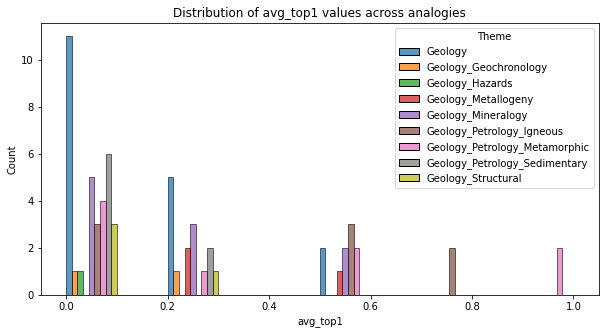

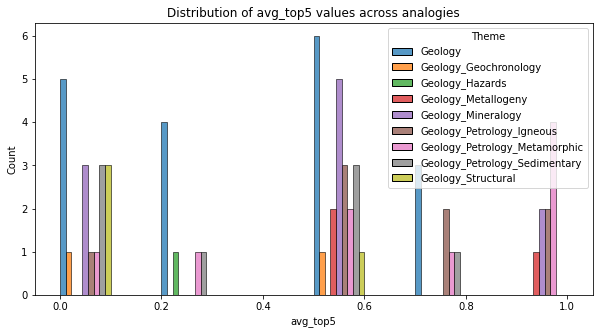

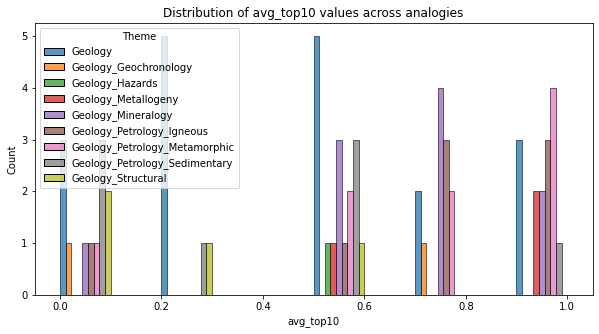

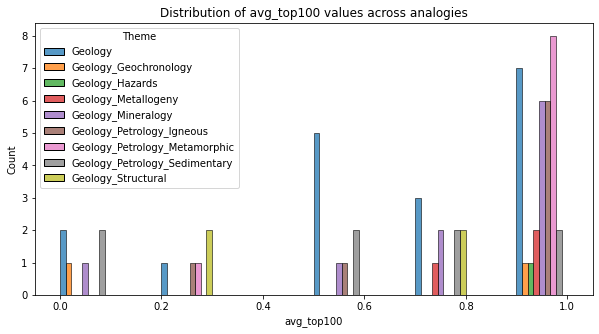

In [27]:
for i in [1,5,10,100]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    column = f'avg_top{i}'
    plt.figure(figsize=(10,5))
    sns.histplot(data=res_df.reset_index(), hue='Theme', x=column, multiple='dodge', bins=10)
    plt.title(f'Distribution of {column} values across analogies')
    plt.show()

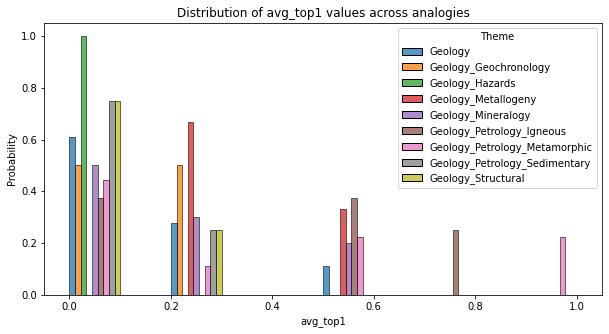

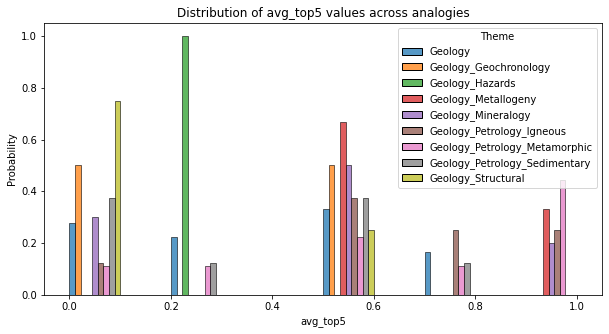

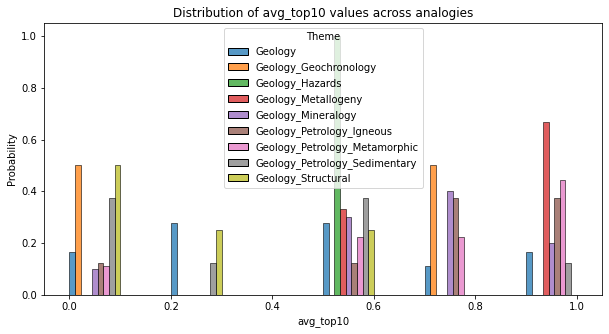

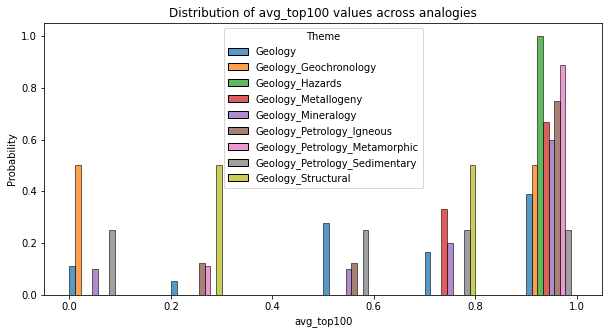

In [28]:
for i in [1,5,10,100]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    column = f'avg_top{i}'
    plt.figure(figsize=(10,5))
    sns.histplot(data=res_df.reset_index(), hue='Theme', x=column, multiple='dodge', bins=10, stat='probability', common_norm=False)
    plt.title(f'Distribution of {column} values across analogies')
    plt.show()

#### Examine specific examples

Let's see the examples where at least one of the top1 failed.

In [29]:
# Get all examples where at least one of the top1-X failed
res_df[(res_df.filter(regex='top1_word-') != 1).sum(axis=1)> 0]

,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,top100_word-a,...,in_vocab-y,avg_top1,avg_top5,avg_top10,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present
0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran,0.0,0.0,0.0,1.0,...,1,0.00,0.00,0.25,0.75,1.00,180.25,0.725739,4,1.0
1,Analogy,Geology,Core,Mantle,Phenocryst,Rim,0.0,0.0,0.0,0.0,...,1,0.00,0.00,0.00,0.00,0.25,847.00,0.878892,4,1.0
2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,0.0,...,1,0.25,0.50,0.50,0.50,0.50,1.50,0.631648,4,1.0
3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,1.0,1.0,1.0,1.0,...,1,0.50,0.50,0.50,1.00,1.00,23.50,0.497447,4,1.0
4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,1.0,1.0,1.0,1.0,...,1,0.25,0.75,0.75,1.00,1.00,5.25,0.579705,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Analogy,Geology_Petrology_Sedimentary,Turbidite,Marine,Sandstone,Fluvial,0.0,0.0,0.0,0.0,...,1,0.00,0.00,0.00,0.00,0.50,331.00,0.770319,4,1.0
62,Analogy,Geology_Structural,Gouge,Unconsolidated,Cataclasite,Consolidated,0.0,0.0,1.0,1.0,...,1,0.00,0.00,0.25,0.75,1.00,76.00,0.700947,4,1.0
63,Analogy,Geology_Structural,Norma,Extension,Reverse,Compression,0.0,0.0,0.0,0.0,...,1,0.00,0.00,0.00,0.25,0.25,34.00,0.783191,4,1.0
64,Analogy,Geology_Structural,Plunge,Lineation,Strike,Planar,0.0,1.0,1.0,1.0,...,1,0.25,0.50,0.50,0.75,1.00,70.50,0.535395,4,1.0


In [30]:
# Get some examples where at least one of the top1-X failed, considering only examples where the 
# calculation was actually performed
res_df[(res_df.filter(regex='top1_word-') == 0).sum(axis=1)> 0].iloc[0:10,:]

,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,top100_word-a,...,in_vocab-y,avg_top1,avg_top5,avg_top10,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present
0,Analogy,Geology,Abitibi,Superior,Stikinia,Cordilleran,0.0,0.0,0.0,1.0,...,1,0.00,0.00,0.25,0.75,1.00,180.25,0.725739,4,1.0
1,Analogy,Geology,Core,Mantle,Phenocryst,Rim,0.0,0.0,0.0,0.0,...,1,0.00,0.00,0.00,0.00,0.25,847.00,0.878892,4,1.0
2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,0.0,...,1,0.25,0.50,0.50,0.50,0.50,1.50,0.631648,4,1.0
3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,1.0,1.0,1.0,1.0,...,1,0.50,0.50,0.50,1.00,1.00,23.50,0.497447,4,1.0
4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,1.0,1.0,1.0,1.0,...,1,0.25,0.75,0.75,1.00,1.00,5.25,0.579705,4,1.0
5,Analogy,Geology,Drumlin,Glacier,Scarp,Fault,0.0,0.0,0.0,0.0,...,1,0.00,0.00,0.25,0.50,1.00,198.50,0.699460,4,1.0
6,Analogy,Geology,Earth,Planet,Sun,Star,0.0,1.0,1.0,1.0,...,1,0.00,0.25,0.25,0.50,1.00,228.75,0.689052,4,1.0
7,Analogy,Geology,Erosion,Sedimentary,Melting,Igneous,0.0,0.0,0.0,1.0,...,1,0.25,0.25,0.25,1.00,1.00,47.25,0.613258,4,1.0
8,Analogy,Geology,Fluid,Vein,Magma,Dyke,0.0,0.0,1.0,1.0,...,1,0.00,0.50,1.00,1.00,1.00,4.25,0.526393,4,1.0
9,Analogy,Geology,Fossil,Paleontology,Water,Hydrology,0.0,0.0,1.0,1.0,...,1,0.00,0.25,0.75,1.00,1.00,14.25,0.638456,4,1.0


In [31]:
# Get all examples where at least one of the top1-X suceeded
res_df[(res_df.filter(regex='top1_word-') == 1).sum(axis=1)> 0]

,Task,Theme,a,x,b,y,top1_word-a,top5_word-a,top10_word-a,top100_word-a,...,in_vocab-y,avg_top1,avg_top5,avg_top10,avg_top100,avg_top1000,avg_rank,avg_distance,n_present,perc_present
2,Analogy,Geology,Core,Inner,Crust,Outer,0.0,0.0,0.0,0.0,...,1,0.25,0.50,0.50,0.50,0.50,1.500000,0.631648,4,1.0
3,Analogy,Geology,Deposition,Sedimentation,Crystallization,Magmatism,1.0,1.0,1.0,1.0,...,1,0.50,0.50,0.50,1.00,1.00,23.500000,0.497447,4,1.0
4,Analogy,Geology,Diverging,Ridge,Converging,Mountain,1.0,1.0,1.0,1.0,...,1,0.25,0.75,0.75,1.00,1.00,5.250000,0.579705,4,1.0
7,Analogy,Geology,Erosion,Sedimentary,Melting,Igneous,0.0,0.0,0.0,1.0,...,1,0.25,0.25,0.25,1.00,1.00,47.250000,0.613258,4,1.0
11,Analogy,Geology,Glacier,Slow,River,Fast,0.0,0.0,0.0,0.0,...,1,0.50,0.50,0.50,0.75,1.00,195.250000,0.612297,4,1.0
14,Analogy,Geology,Rigid,Lithosphere,Convecting,Asthenosphere,0.0,0.0,0.0,1.0,...,1,0.25,0.50,0.50,0.75,1.00,51.500000,0.618640,4,1.0
17,Analogy,Geology,Veins,Hydrothermal,Dykes,Magmatic,0.0,0.0,1.0,1.0,...,1,0.25,0.75,1.00,1.00,1.00,3.000000,0.467556,4,1.0
19,Analogy,Geology_Geochronology,Superior,Archean,Grenville,Proterozoic,0.0,0.0,1.0,1.0,...,1,0.25,0.50,0.75,1.00,1.00,7.250000,0.508645,4,1.0
21,Analogy,Geology_Metallogeny,Copper,Porphyry,Lithium,Pegmatite,0.0,1.0,1.0,1.0,...,1,0.25,0.50,1.00,1.00,1.00,4.000000,0.535769,4,1.0
23,Analogy,Geology_Metallogeny,Gold,Hydrothermal,Nickel,Magmatic,0.0,0.0,0.0,0.0,...,1,0.25,0.50,0.50,0.75,1.00,39.500000,0.607011,4,1.0


In [32]:
for i in [1,5,10,100]:
    column = f'top{i}_'
    print(f'TEST: {column}')
    print('===============')
    x = res_df.filter(regex=column).sum().sum()
    total = res_df.filter(regex=column).shape[0]*4
    print(f'Total number of correct responses: {x}/{total} ({x/total})')
    x = res_df.filter(regex="in_vocab").sum().sum()
    print(f'Total number of missing words: {x}/{total} ({x/total})')
    print(f'Coverage: {total-x}/{total} ({(total-x)/total})')

TEST: top1_
Total number of correct responses: 49.0/264 (0.1856060606060606)
Total number of missing words: 261/264 (0.9886363636363636)
Coverage: 3/264 (0.011363636363636364)
TEST: top5_
Total number of correct responses: 110.0/264 (0.4166666666666667)
Total number of missing words: 261/264 (0.9886363636363636)
Coverage: 3/264 (0.011363636363636364)
TEST: top10_
Total number of correct responses: 137.0/264 (0.5189393939393939)
Total number of missing words: 261/264 (0.9886363636363636)
Coverage: 3/264 (0.011363636363636364)
TEST: top100_
Total number of correct responses: 185.0/264 (0.7007575757575758)
Total number of missing words: 261/264 (0.9886363636363636)
Coverage: 3/264 (0.011363636363636364)


## Evaluate Relatedness

We are given pairs of similar words, A and B. We want to ask whether these words are indeed similar according to the model. Since the quanitification of similarity is difficult (for humans), we ask an easier question: are A and B's representations (`a` and `b`) closer to one another in embedding space than for some less similar word C?

For evaluation, our main concern is how to pick words that are "less similar". Our dataset contains, pairs of words grouped by themes (e.g. Location_Places, Geology_Geochronology_Eon) and some "gradients" of words are a set of words ordered by similarity. We use these themes and gradients to select "less similar" words. There are 4 possible types of comparisons:

1. Intra-Gradient (aka Gradient) 
2. Intra-Theme
3. Outra-Theme
4. Inter-Theme

We'll describe each below. 

**Gradients**:
We treat gradients separately. We ask: Is every word in the gradient closer to its neighbors than the other words in the gradient?

**Intra-Theme**:
We assume that a word is more similar to its partner than it is to every other word in the Theme and thus ask: Is this word more similar to its partner than all other words in other themes? (The exception is other words that are also paired with the word under consideration. E.g. if Abitibi, Ontario and Abitibi, Quebec are both pairs, we avoid comparing across pairs.)

**Outra-Theme**:
We assume that a word is more similar to its partner than to any other word in another Theme. We again avoid comparisons with other words that might also be paired wtih the word of interest. 

**Inter-Theme**:
We do NOT make the assumption that a word is more similar to other words in its Theme than to words in other Themes. These kinds of comparisons are excluded from the analysis.


On top of the above considerations, we also take special account of synonyms (as marked in the dataset). We also avoid comparison across partners of synonyms.

This results in a very large number of comparisons. 

In [33]:
from nrcan_p2.evaluation.relatedness import run_relatedness_comparisons

In [34]:
relatedness_results = run_relatedness_comparisons(model, relatedness_tests)

In [35]:
relatedness_results.to_csv(f'{OUTPUT_FOLDER}/relatedness_{MODEL_NAME}.csv')
relatedness_results

,a,a_sim,a_diff,Task,Theme,rowid,Type,Pass
0,Hadean,Archean,Proterozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True
1,Hadean,Archean,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True
2,Hadean,Proterozoic,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,False
3,Archean,Proterozoic,Phanerozoic,Relatedness,Geology_Geochronology_Eon,70,Gradient,True
4,Proterozoic,Archean,Hadean,Relatedness,Geology_Geochronology_Eon,70,Gradient,True
...,...,...,...,...,...,...,...,...
18,Spectrometry,Spectroscopy,Eletron,Relatedness,Methods,248,Intra-theme,NaN
19,Spectrometry,Spectroscopy,Susceptibility,Relatedness,Methods,248,Intra-theme,True
20,Spectrometry,Spectroscopy,Diffraction,Relatedness,Methods,248,Intra-theme,NaN
21,Spectrometry,Spectroscopy,Gravity,Relatedness,Methods,248,Intra-theme,True


In [36]:
relatedness_results[(relatedness_results.rowid == 1) & (relatedness_results.Type == 'Outra-theme')]

,a,a_sim,a_diff,Task,Theme,rowid,Type,Pass
0,Air,Stratosphere,Zoning,Relatedness,Earth System Science,1,Outra-theme,True
1,Air,Stratosphere,Sulphide,Relatedness,Earth System Science,1,Outra-theme,False
2,Air,Stratosphere,Glacial,Relatedness,Earth System Science,1,Outra-theme,False
3,Air,Stratosphere,Subangular,Relatedness,Earth System Science,1,Outra-theme,True
4,Air,Stratosphere,Arkose,Relatedness,Earth System Science,1,Outra-theme,True
...,...,...,...,...,...,...,...,...
315,Stratosphere,Air,Enstatite,Relatedness,Earth System Science,1,Outra-theme,True
316,Stratosphere,Air,Loose,Relatedness,Earth System Science,1,Outra-theme,True
317,Stratosphere,Air,Phyllite,Relatedness,Earth System Science,1,Outra-theme,True
318,Stratosphere,Air,Oil,Relatedness,Earth System Science,1,Outra-theme,True


### Overall results per group and theme

In [37]:
dff = relatedness_results.groupby(['Type', 'Theme']).Pass.value_counts(normalize=True, dropna=False).to_frame().rename(columns={'Pass': 'score'}).reset_index(level=2)
dff
dff[(dff.Pass == True) | (dff.Pass.isnull())].to_csv(f'{OUTPUT_FOLDER}/relatedness_summary_per_type_theme_{MODEL_NAME}.csv')
dff[(dff.Pass == True) | (dff.Pass.isnull())]

Pass     score
Type        Theme                                              
Gradient    Geology_Geochronology_Eon            True  0.875000
            Geology_Geochronology_Period         True  0.808824
            Geology_Mineralogy                   True  0.809524
            Geology_Petrology_Igneous            True  0.489691
            Geology_Petrology_Igneous             NaN  0.319588
            Geology_Petrology_Metamorphic        True  0.750000
            Geology_Petrology_Sedimentary        True  0.802083
Intra-theme Earth System Science                 True  0.815583
            Earth System Science                  NaN  0.066160
            Geology_Hazards                      True  0.892857
            Geology_Metallogeny                  True  0.806476
            Geology_Metallogeny                   NaN  0.079819
            Geology_Mineralogy                   True  0.777567
            Geology_Mineralogy                    NaN  0.147022
            Geology_Petrology_Igneous            True  0.748305
            Geology_Petrology_Igneous             NaN  0.094168
            Geology_Petrology_Metamorphic        True  0.595489
            Geology_Petrology_Metamorphic         NaN  0.216541
            Geology_Petrology_Sedimentary        True  0.713163
            Geology_Petrology_Sedimentary         NaN  0.139995
            Geology_Structral                    True  0.820282
            Location_Metallogeny                 True  0.791667
            Location_Places                      True  0.663934
            Location_Places                       NaN  0.245902
            Methods                              True  0.505051
            Methods                               NaN  0.430976
Outra-theme Earth System Science                 True  0.844057
            Earth System Science                  NaN  0.091331
            Geology_Geochronology_Carbonifeorus  True  0.954023
            Geology_Geochronology_Carbonifeorus   NaN  0.043678
            Geology_Geochronology_Eon            True  0.822171
            Geology_Geochronology_Eon             NaN  0.043880
            Geology_Geochronology_Period         True  0.953461
            Geology_Geochronology_Period          NaN  0.045346
            Geology_Hazards                      True  0.940014
            Geology_Hazards                       NaN  0.044176
            Geology_Metallogeny                  True  0.880170
            Geology_Metallogeny                   NaN  0.084978
            Geology_Mineralogy                   True  0.841530
            Geology_Mineralogy                    NaN  0.137656
            Geology_Petrology_Igneous            True  0.827729
            Geology_Petrology_Igneous             NaN  0.094319
            Geology_Petrology_Metamorphic        True  0.700558
            Geology_Petrology_Metamorphic         NaN  0.178274
            Geology_Petrology_Sedimentary        True  0.804520
            Geology_Petrology_Sedimentary         NaN  0.131497
            Geology_Structral                    True  0.871163
            Geology_Structral                     NaN  0.047178
            Location_Metallogeny                 True  0.895406
            Location_Metallogeny                  NaN  0.043918
            Location_Places                      True  0.795398
            Location_Places                       NaN  0.179090
            Methods                              True  0.635724
            Methods                               NaN  0.332809

/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


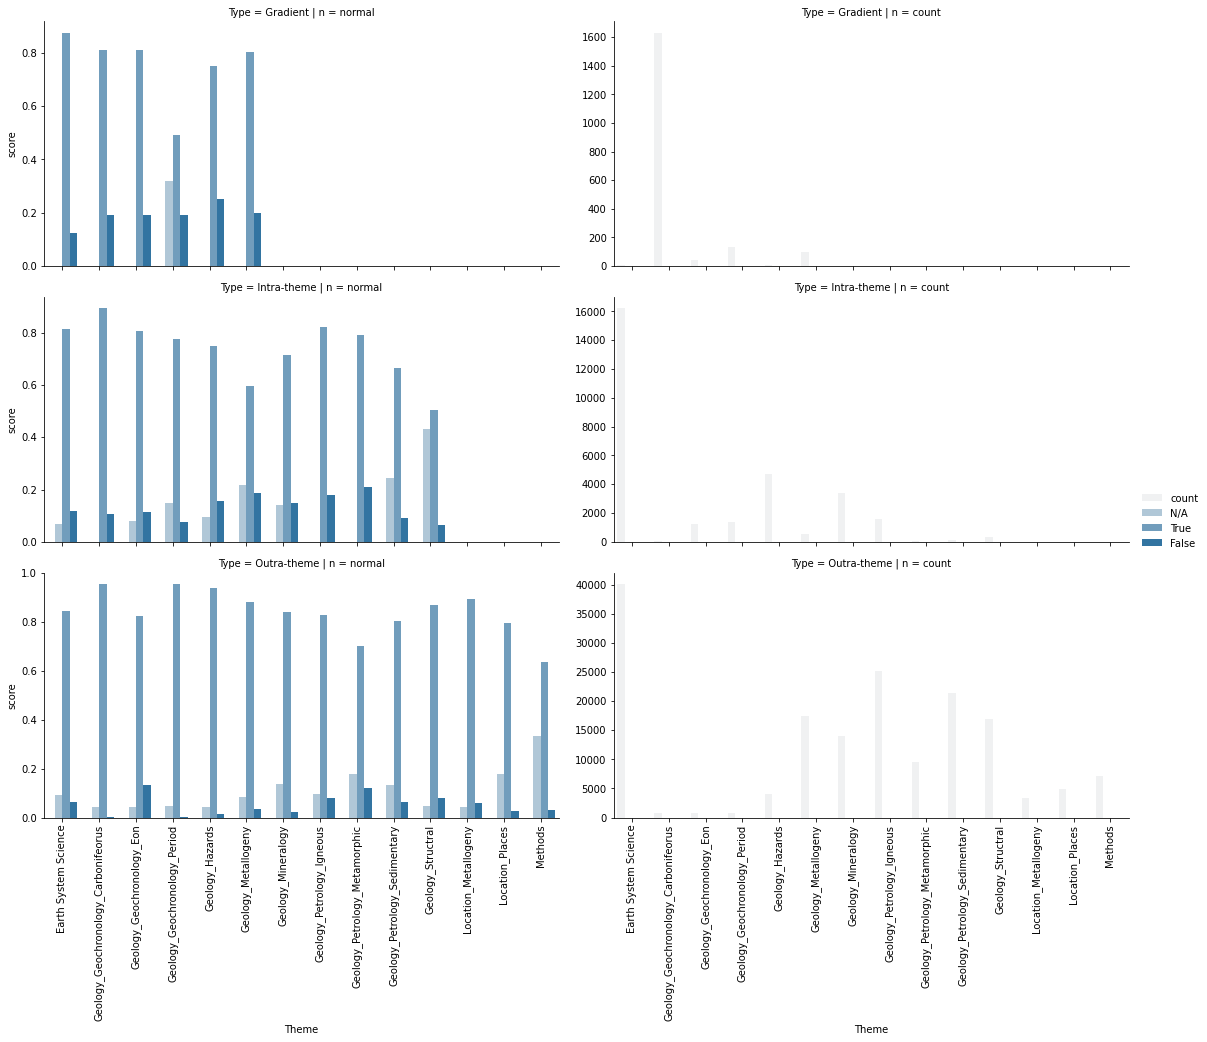

In [38]:
import pandas as pd
dfff = relatedness_results.groupby(['Type', 'Theme']).Pass.count().to_frame().rename(columns={'Pass': 'score'}).reset_index()
dfff['Pass'] = 'count'
dfff['n']= 'count'
#display(dfff)
dff = relatedness_results.groupby(['Type', 'Theme']).Pass.value_counts(normalize=True, dropna=False).to_frame().rename(columns={'Pass': 'score'}).reset_index(level=2)
dff = dff.reset_index()
#display(dff)
dff.loc[dff.Pass.isnull(), 'Pass'] = 'N/A'
dff['n'] = 'normal'
#dff = pd.merge(dff, dfff, on=['Type', 'Theme'])
dff = pd.concat([dff, dfff])
#display(dff)
#display(dff)
g = sns.FacetGrid(dff, row="Type", col='n', 
                  size=4, aspect=2, sharey=False)
g.map(sns.barplot, 'Theme', 'score', "Pass", hue_order=['count','N/A', True,False]) #, order=times)
g.add_legend()
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [39]:
dff = relatedness_results.groupby(['Type']).Pass.value_counts(normalize=True, dropna=False).to_frame().rename(columns={'Pass': 'score'}).reset_index('Pass')
dff[(dff.Pass==True) | (dff.Pass.isnull())].to_csv(f'{OUTPUT_FOLDER}/relatedness_summary_type_{MODEL_NAME}.csv')
dff[(dff.Pass==True) | (dff.Pass.isnull())]

,Pass,score
Type,,
Gradient,True,0.777328
Gradient,NaN,0.031377
Intra-theme,True,0.779725
Intra-theme,NaN,0.091159
Outra-theme,True,0.824122
Outra-theme,NaN,0.115653


In [40]:
dff = relatedness_results.groupby(['Theme']).Pass.value_counts(normalize=True, dropna=False).to_frame().rename(columns={'Pass': 'score'}).reset_index('Pass')
dff[(dff.Pass==True) | (dff.Pass.isnull())].to_csv(f'{OUTPUT_FOLDER}/relatedness_summary_theme_{MODEL_NAME}.csv')
dff[(dff.Pass==True) | (dff.Pass.isnull())]

,Pass,score
Theme,,
Earth System Science,True,0.836020
Earth System Science,NaN,0.084227
Geology_Geochronology_Carbonifeorus,True,0.954023
Geology_Geochronology_Carbonifeorus,NaN,0.043678
Geology_Geochronology_Eon,True,0.822654
Geology_Geochronology_Eon,NaN,0.043478
Geology_Geochronology_Period,True,0.857895
Geology_Geochronology_Period,NaN,0.015385
Geology_Hazards,True,0.939408


## Evaluate NN

Here we ask, according to the model, which words are most similar to word A? This shows us the kinds of associations that are being made by the model. We expect it to have learned key domain-specific similarities. We also expect that the neighgbours of some words will change significantly from a domain-agnostic model, when those words take on new, domain-specific meanings.

The neighbours are evaluated manually by a domain expert. This evaluation is qualitative. While we may then also attempt to quantify the quality of the neighbourhoods by determining the number "reasonable" neighbours, this is not necessarily recommended since the distribution of words may not be even in embedding space (ie some words may have 3 close and relevant neighbors while others might have 100).

In [41]:
from nrcan_p2.evaluation.nearest_neighbours import predict_all_nearest_neigbour
            
res_df = predict_all_nearest_neigbour(model, nn_tests, k=10)

In [42]:
res_df.head()

,id,word,nn,similarity
0,1,Earth,sciences,0.710522
1,1,Earth,physics,0.603766
2,1,Earth,science,0.584543
3,1,Earth,journal,0.569864
4,1,Earth,planetary,0.562544


In [43]:
df = res_df[['id', 'word', 'nn']]
display(df)
df.to_csv(f'{OUTPUT_FOLDER}/{MODEL_NAME}_nn.csv')

,id,word,nn
0,1,Earth,sciences
1,1,Earth,physics
2,1,Earth,science
3,1,Earth,journal
4,1,Earth,planetary
5,1,Earth,sci
6,1,Earth,v
7,1,Earth,crust
8,1,Earth,planet
9,1,Earth,evolution


## Evaluate Clustering

In the clustering task, we ask whether the model can separate related words into distinct groups. In some sense, we are asking whether there meaningful ways to divide the embedding space, such that word groups can be distinguished. 

We treat this as a supervised task: given two groups of words and their group labels, is the model able to distinguish whether a new word belongs to group A or group B. We first train a separate model to classify each possible pair of groups in the dataset. We then train a multi-class model to separate all of the groups from one another. 

There are a number of ways to do the training. Here, we use leave one out cross validation: for every word, X, in groups A and B, we train a model excluding X and then ask the model to classify X.

The quality of the groupings is somewhat dependent on the choice of classifier. If the classification boundary is linear (in multi-dimensional embedding space), we can use a simpler classifier. A non-linear boundary would require a more complex classifier. 

In [44]:
from nrcan_p2.evaluation.word_clustering import run_loo_classification_for_every_cluster_pair, get_wordvec_matrix_from_cluster_tests, leave_one_out_classification

We define a function to intialize our classifier. Any sklearn compatible classifier would do.

In [45]:
from sklearn.naive_bayes import BernoulliNB

clf_init = lambda: BernoulliNB()

### Run leave out one cross validation for each pair

In [46]:
all_preds, all_scores, res = run_loo_classification_for_every_cluster_pair(cluster_tests, model, clf_init)

('Alteration types', 'Compositions')
('Alteration types', 'Envionment')
('Alteration types', 'Events')
('Alteration types', 'Fault types')
('Alteration types', 'Foliation type')
('Alteration types', 'Genetic')
('Alteration types', 'Geometry')
('Alteration types', 'Lineation')
('Alteration types', 'Metamorphic facies')
('Alteration types', 'Particle shapes')
('Alteration types', 'Particle types')
('Alteration types', 'Rock types')
('Alteration types', 'Commodities')
('Alteration types', 'Envionmental impact')
('Alteration types', 'Exploration activity')
('Compositions', 'Envionment')
('Compositions', 'Events')
('Compositions', 'Fault types')
('Compositions', 'Foliation type')
('Compositions', 'Genetic')
('Compositions', 'Geometry')
('Compositions', 'Lineation')
('Compositions', 'Metamorphic facies')
('Compositions', 'Particle shapes')
('Compositions', 'Particle types')
('Compositions', 'Rock types')
('Compositions', 'Commodities')
('Compositions', 'Envionmental impact')
('Compositions',

In [47]:
def word_in_vocab(word, model):
    try:
        model[word]
        return True
    except KeyError as e:
        return False
        
    
cluster_tests['Word_in_vocab'] = cluster_tests.Word.apply(lambda x: word_in_vocab(x, model))

In [48]:
cluster_tests.to_csv(f'{OUTPUT_FOLDER}/clustering_tests_{MODEL_NAME}.csv')
cluster_tests

,Cluster,Word,Word_in_vocab
0,Alteration types,argillic,True
1,Alteration types,albitic,True
2,Alteration types,alunitic,True
3,Alteration types,calcsilicate,True
4,Alteration types,carbonate,True
...,...,...,...
895,Exploration activity,sampling,True
896,Exploration activity,subsurface,True
897,Exploration activity,surface,True
898,Exploration activity,systematic,True


In [49]:
# the number of words per category
cluster_tests.groupby('Cluster').agg({'Word': 'count', 'Word_in_vocab': 'mean'})

,Word,Word_in_vocab
Cluster,,
Alteration types,20,0.950000
Commodities,222,0.977477
Compositions,27,1.000000
Envionment,92,1.000000
Envionmental impact,30,0.966667
Events,51,0.980392
Exploration activity,25,1.000000
Fault types,14,1.000000
Foliation type,55,1.000000


In [50]:
res.scores.describe().to_frame()

,scores
count,120.000000
mean,0.891681
std,0.071941
min,0.655114
25%,0.854464
50%,0.900000
75%,0.952189
max,1.000000


In [51]:
# extend the dataframe so that each Theme in a pair is in column 0 
res2 = res.copy()
res2.columns = [1,0,'scores']
res2 = res2[[0,1,'scores']]

res_concat = pd.concat([res2,res])
res_concat.to_csv(f'{OUTPUT_FOLDER}/clustering_{MODEL_NAME}.csv')
res_concat = pd.merge(res_concat, cluster_tests.groupby('Cluster').agg({'Word': 'count', 'Word_in_vocab': 'mean'}).reset_index(), left_on=1, right_on='Cluster').rename(columns={'Word': 'nwords', 'Word_in_vocab': 'perc_words_in_vocab'})
res_concat.to_csv(f'{OUTPUT_FOLDER}/clustering_merged_{MODEL_NAME}.csv')
res_concat

,0,1,scores,Cluster,nwords,perc_words_in_vocab
0,Compositions,Alteration types,0.730994,Alteration types,20,0.95
1,Envionment,Alteration types,1.000000,Alteration types,20,0.95
2,Events,Alteration types,0.911053,Alteration types,20,0.95
3,Fault types,Alteration types,0.964286,Alteration types,20,0.95
4,Foliation type,Alteration types,0.964593,Alteration types,20,0.95
...,...,...,...,...,...,...
235,Particle shapes,Exploration activity,0.966667,Exploration activity,25,1.00
236,Particle types,Exploration activity,0.930588,Exploration activity,25,1.00
237,Rock types,Exploration activity,0.987342,Exploration activity,25,1.00
238,Commodities,Exploration activity,0.961567,Exploration activity,25,1.00


In [52]:
# the average classification performance for each cluster (across being paired with all other clusters)
pd.merge(res_concat.groupby(0).scores.describe(), res_concat[['Cluster','nwords', 'perc_words_in_vocab']].set_index('Cluster').groupby('Cluster').mean(), left_index=True, right_index=True) 

,count,mean,std,min,25%,50%,75%,max,nwords,perc_words_in_vocab
0,,,,,,,,,,
Alteration types,15.0,0.925967,0.083910,0.730994,0.882824,0.964286,0.986842,1.000000,20,0.950000
Commodities,15.0,0.898385,0.054020,0.788967,0.860139,0.910297,0.934677,0.980740,222,0.977477
Compositions,15.0,0.889122,0.086691,0.727145,0.844857,0.908685,0.952963,1.000000,27,1.000000
Envionment,15.0,0.928486,0.037792,0.871483,0.900951,0.917702,0.957183,1.000000,92,1.000000
Envionmental impact,15.0,0.918035,0.059386,0.764828,0.886917,0.933872,0.960566,1.000000,30,0.966667
Events,15.0,0.870990,0.063896,0.737586,0.840722,0.881176,0.920759,0.943607,51,0.980392
Exploration activity,15.0,0.960302,0.033027,0.868276,0.950040,0.966667,0.978192,1.000000,25,1.000000
Fault types,15.0,0.916068,0.043178,0.827143,0.889693,0.917702,0.964286,0.964286,14,1.000000
Foliation type,15.0,0.875974,0.079217,0.655114,0.844650,0.867213,0.919947,0.981818,55,1.000000


In [53]:
res_concat

,0,1,scores,Cluster,nwords,perc_words_in_vocab
0,Compositions,Alteration types,0.730994,Alteration types,20,0.95
1,Envionment,Alteration types,1.000000,Alteration types,20,0.95
2,Events,Alteration types,0.911053,Alteration types,20,0.95
3,Fault types,Alteration types,0.964286,Alteration types,20,0.95
4,Foliation type,Alteration types,0.964593,Alteration types,20,0.95
...,...,...,...,...,...,...
235,Particle shapes,Exploration activity,0.966667,Exploration activity,25,1.00
236,Particle types,Exploration activity,0.930588,Exploration activity,25,1.00
237,Rock types,Exploration activity,0.987342,Exploration activity,25,1.00
238,Commodities,Exploration activity,0.961567,Exploration activity,25,1.00


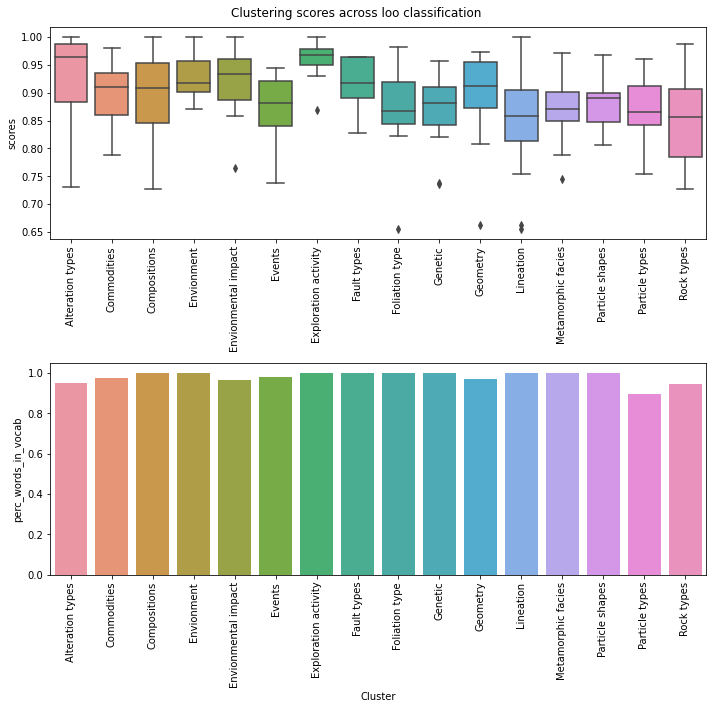

In [54]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
g = sns.boxplot(data=res_concat.sort_values(0), x=0, y='scores', ax=ax1)
plt.xticks(rotation=90)
plt.xlabel('')

ax2 = fig.add_subplot(212)
g = sns.barplot(data=res_concat.sort_values(1), x=1, y='perc_words_in_vocab',ax=ax2)
plt.xticks(rotation=90)
#plt.close()
#plt.close(3)
plt.xlabel('Cluster')
plt.suptitle('Clustering scores across loo classification')
plt.tight_layout()

In [55]:
# the three groups that a given group has the most trouble with
res_concat.sort_values('scores').groupby(0, as_index=False).head(3).sort_values(0)

,0,1,scores,Cluster,nwords,perc_words_in_vocab
183,Alteration types,Rock types,0.796802,Rock types,167,0.946108
141,Alteration types,Metamorphic facies,0.832817,Metamorphic facies,17,1.000000
29,Alteration types,Compositions,0.730994,Compositions,27,1.000000
26,Commodities,Compositions,0.833504,Compositions,27,1.000000
180,Commodities,Rock types,0.854066,Rock types,167,0.946108
138,Commodities,Metamorphic facies,0.788967,Metamorphic facies,17,1.000000
170,Compositions,Particle types,0.773420,Particle types,57,0.894737
184,Compositions,Rock types,0.727145,Rock types,167,0.946108
0,Compositions,Alteration types,0.730994,Alteration types,20,0.950000
143,Envionment,Metamorphic facies,0.871483,Metamorphic facies,17,1.000000


In [56]:
# the worst scores are associated with which clusters?
res_concat.sort_values('scores').head(15).sort_values(0)

,0,1,scores,Cluster,nwords,perc_words_in_vocab
29,Alteration types,Compositions,0.730994,Compositions,27,1.000000
184,Compositions,Rock types,0.727145,Rock types,167,0.946108
0,Compositions,Alteration types,0.730994,Alteration types,20,0.950000
102,Events,Genetic,0.737586,Genetic,29,1.000000
132,Foliation type,Lineation,0.655114,Lineation,16,1.000000
189,Genetic,Rock types,0.736141,Rock types,167,0.946108
47,Genetic,Events,0.737586,Events,51,0.980392
134,Geometry,Lineation,0.662910,Lineation,16,1.000000
77,Lineation,Foliation type,0.655114,Foliation type,55,1.000000
105,Lineation,Geometry,0.662910,Geometry,63,0.968254


                      precision    recall  f1-score   support

    Alteration types       0.36      0.42      0.39        19
         Commodities       0.83      0.75      0.79       217
        Compositions       0.28      0.41      0.33        27
          Envionment       0.77      0.79      0.78        92
 Envionmental impact       0.38      0.52      0.44        29
              Events       0.49      0.46      0.47        50
Exploration activity       0.59      0.76      0.67        25
         Fault types       0.59      0.71      0.65        14
      Foliation type       0.68      0.45      0.54        55
             Genetic       0.18      0.28      0.22        29
            Geometry       0.59      0.49      0.54        61
           Lineation       0.31      0.25      0.28        16
  Metamorphic facies       0.29      0.35      0.32        17
     Particle shapes       0.59      0.67      0.62        15
      Particle types       0.36      0.61      0.45        51
       

Text(0, 0.5, 'True')

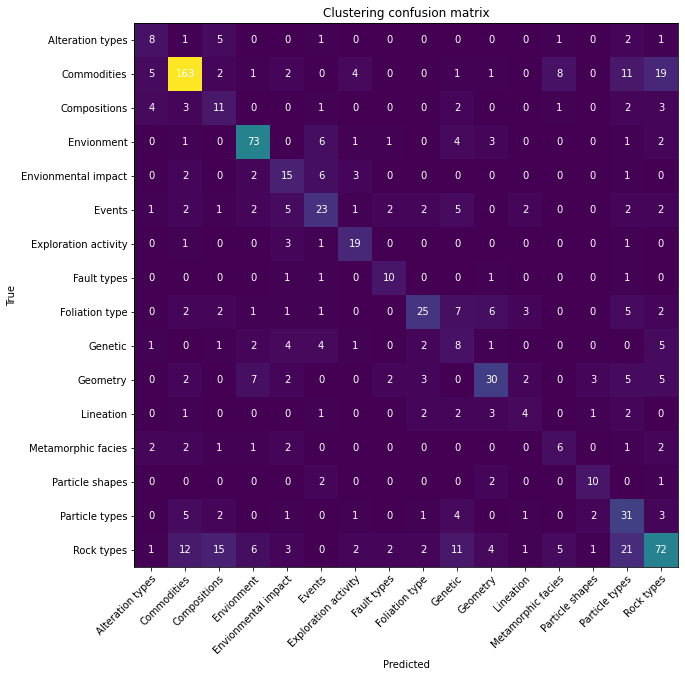

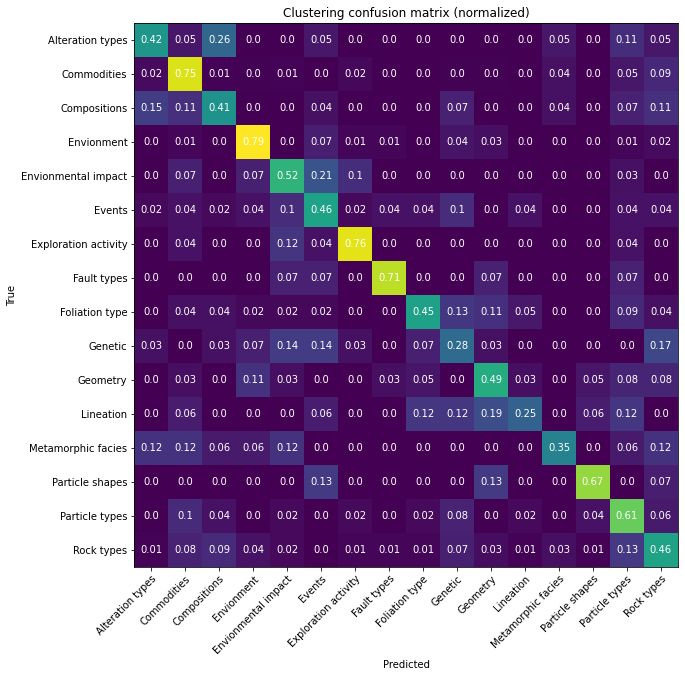

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
from nrcan_p2.evaluation.visualization import plot_confusion_matrix

X,y = get_wordvec_matrix_from_cluster_tests(cluster_tests, model)
preds, scores = leave_one_out_classification(X, y, clf_init)

print(classification_report(y, preds))
    
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, y)
plt.title('Clustering confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
cm = confusion_matrix(y, preds, normalize='true')
plot_confusion_matrix(cm, y)
plt.title('Clustering confusion matrix (normalized)')
plt.xlabel('Predicted')
plt.ylabel('True')

## Visualization

In [58]:
from whatlies.language import GensimLanguage

In [59]:
model.wv.save('vectors.kv')

<ipython-input-59-291f4132c2dd>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  model.wv.save('vectors.kv')


In [60]:
lang = GensimLanguage("vectors.kv")

In [61]:
relatedness_gradients = relatedness_tests[relatedness_tests.l.str.len() > 2].l

In [62]:
l1 = relatedness_tests[relatedness_tests.Theme == 'Geology_Geochronology_Carbonifeorus'].l.sum()
l2 = relatedness_tests[relatedness_tests.Theme == 'Geology_Geochronology_Eon'].l.sum()
l3 = relatedness_tests[relatedness_tests.Theme == 'Geology_Geochronology_Period'].l.sum()

In [63]:
relatedness_gradients

70           [Hadean, Archean, Proterozoic, Phanerozoic]
71     [Eoarchean, Paleoarchean, Mesoarchean, Neoarch...
100    [Albite, Oligoclase, Andesine, Labradorite, By...
109                      [Euhedral, Subhedral, Anhedral]
130              [Komatiite, Basalt, Andesite, Rhyolite]
133                    [Lherzolite, Harzburgite, Dunite]
137    [Olivine, Pyroxene, Amphibole , Biotite, Anort...
140               [Peridotite, Gabbro, Diorite, Granite]
151           [Ultramafic , Mafic, Intermediate, Felsic]
164                [Greenschist, Amphibolite, Granulite]
170                            [Slate, Phyllite, Schist]
172           [Angular, Subangular, Subrounded, Rounded]
175          [Boulder, Cobble, Pebble, Sand, Silt, Clay]
179       [Conglomerate, Sandstone, Siltstone, Mudstone]
199    [Supergroup, Group, Subgroup, Formation, Membe...
Name: l, dtype: object

In [64]:
l3

['Eoarchean',
 'Paleoarchean',
 'Mesoarchean',
 'Neoarchean',
 'Paleoproterozoic',
 'Mesoproterozoic',
 'Neoproterozoic',
 'Cambrian',
 'Ordovician',
 'Silurian',
 'Devonian',
 'Carboniferous',
 'Permian',
 'Triassic',
 'Jurassic',
 'Cretaceous',
 'Paleogene',
 'Neogene']

In [65]:
l1

['Mississippian', 'Pennsylvanian']

In [66]:
emb1 = lang[l1]
emb2 = lang[l2]
emb3 = lang[l3]

In [67]:
import matplotlib.pyplot as plt
from whatlies.transformers import Pca, Umap

for l in relatedness_gradients:
    print(l)
    plt.figure()
    emb = lang[l]    
    try:
        emb_all = emb.transform(Umap(n_neighbors=100, n_components=2))
        chart = emb_all.plot_interactive(color='set').properties(width=600, height=450)
    except Exception as e:
        continue
    
    chart.display()

['Hadean', 'Archean', 'Proterozoic', 'Phanerozoic']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Eoarchean', 'Paleoarchean', 'Mesoarchean', 'Neoarchean', 'Paleoproterozoic', 'Mesoproterozoic', 'Neoproterozoic', 'Cambrian', 'Ordovician', 'Silurian', 'Devonian', 'Carboniferous', 'Permian', 'Triassic', 'Jurassic', 'Cretaceous', 'Paleogene', 'Neogene']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Albite', 'Oligoclase', 'Andesine', 'Labradorite', 'Bytownite', 'Anorthite']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Euhedral', 'Subhedral', 'Anhedral']
['Komatiite', 'Basalt', 'Andesite', 'Rhyolite']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/opt/conda/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Lherzolite', 'Harzburgite', 'Dunite']
['Olivine', 'Pyroxene', 'Amphibole ', 'Biotite', 'Anorthite', 'Albite', 'Orthoclase', 'Muscovite', 'Quartz']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/opt/conda/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Peridotite', 'Gabbro', 'Diorite', 'Granite']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Ultramafic ', 'Mafic', 'Intermediate', 'Felsic']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Greenschist', 'Amphibolite', 'Granulite']
['Slate', 'Phyllite', 'Schist']
['Angular', 'Subangular', 'Subrounded', 'Rounded']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/opt/conda/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/opt/conda/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Boulder', 'Cobble', 'Pebble', 'Sand', 'Silt', 'Clay']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Conglomerate', 'Sandstone', 'Siltstone', 'Mudstone']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

['Supergroup', 'Group', 'Subgroup', 'Formation', 'Member', 'Bed']


/tmp/.local/lib/python3.8/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


alt.LayerChart(...)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Visualize PCA in 1 or 2 dimensions

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [69]:
l1 = l3

In [70]:
def show_pca_plot(l1, DIMS):
    embs = [model[x.lower()] for x in l1 if x.lower() in model]
    names = [x for x in l1 if x.lower() in model]


    embs = [np.expand_dims(emb, axis=1) for emb in embs]
    embs_arr = np.concatenate(embs, axis=1)
    embs_arr.shape

    try:
        pca = PCA(n_components=2)
        X = pca.fit(embs_arr.transpose()).transform(embs_arr.transpose())
    except Exception as e:
        return 

    display(X.shape)
    X[:,0].shape

    plt.figure(figsize = (20,5))
    colors = ['navy', 'turquoise', 'darkorange']
    lw = 2

    if DIMS == 1:
        y = np.zeros(shape=X.shape[0])
        xytexty = lambda x: -20-((10-x)%10)*10
        arrowprops=dict(arrowstyle='-', color='black')
        rotation=0
    elif DIMS == 2:
        y = X[:,1]
        xytexty = lambda x: 20 - (i%2)*10
        arrowprops=None #dict(arrowstyle='')
        rotation=45
    else:
        raise ValueError()

    plt.scatter(X[:,0], y , alpha=.8, lw=lw)
    ax = plt.gca()
    for i, txt in enumerate(names):
        ax.annotate(txt, xy=(X[i,0], y[i]), xycoords='data',
                    xytext=(0,xytexty(i)), rotation=rotation,
                   textcoords='offset points',
                   arrowprops=arrowprops)

    #plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA')

    plt.show()

['Hadean', 'Archean', 'Proterozoic', 'Phanerozoic']


(4, 2)

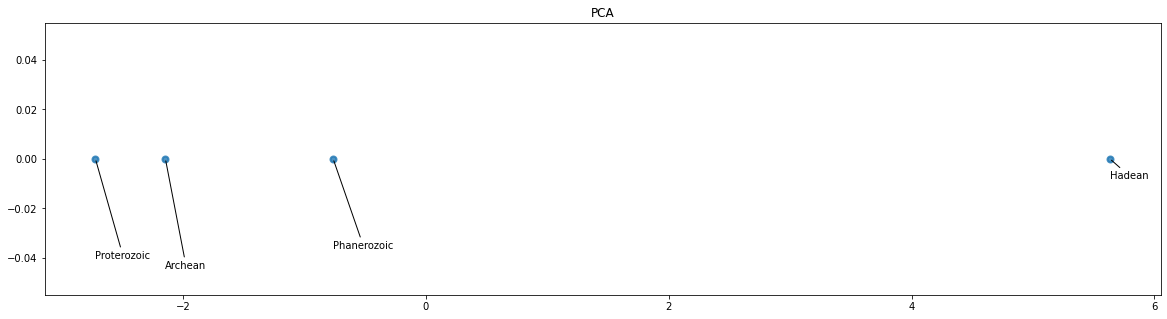

['Eoarchean', 'Paleoarchean', 'Mesoarchean', 'Neoarchean', 'Paleoproterozoic', 'Mesoproterozoic', 'Neoproterozoic', 'Cambrian', 'Ordovician', 'Silurian', 'Devonian', 'Carboniferous', 'Permian', 'Triassic', 'Jurassic', 'Cretaceous', 'Paleogene', 'Neogene']


(18, 2)

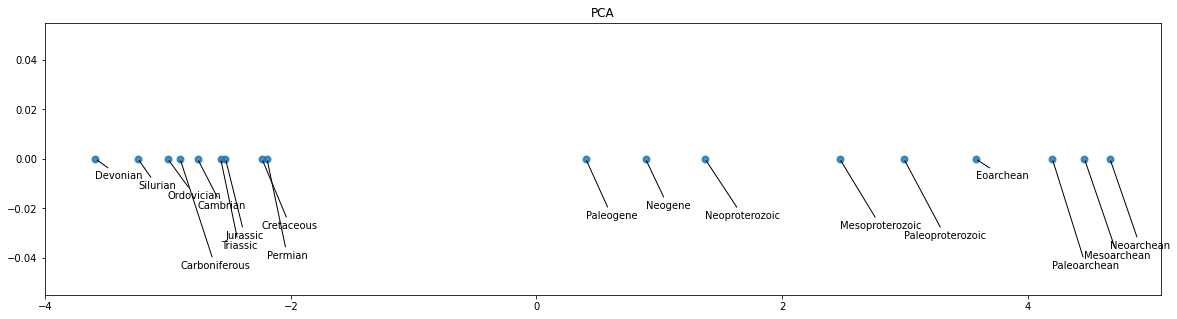

['Albite', 'Oligoclase', 'Andesine', 'Labradorite', 'Bytownite', 'Anorthite']


(6, 2)

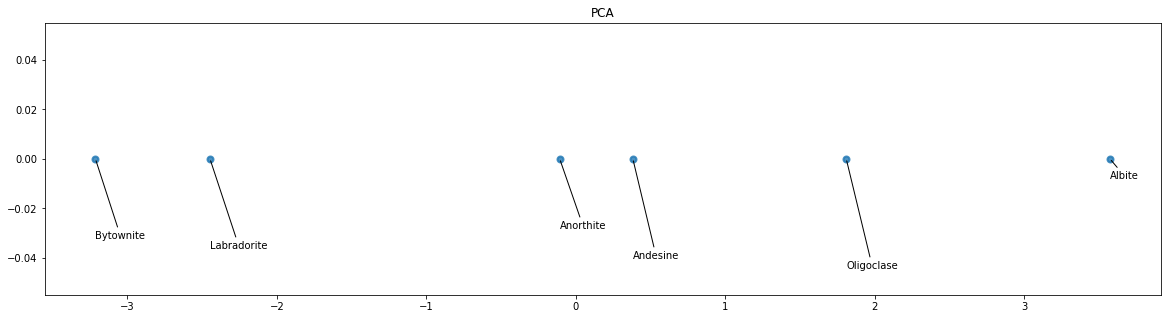

['Euhedral', 'Subhedral', 'Anhedral']


(3, 2)

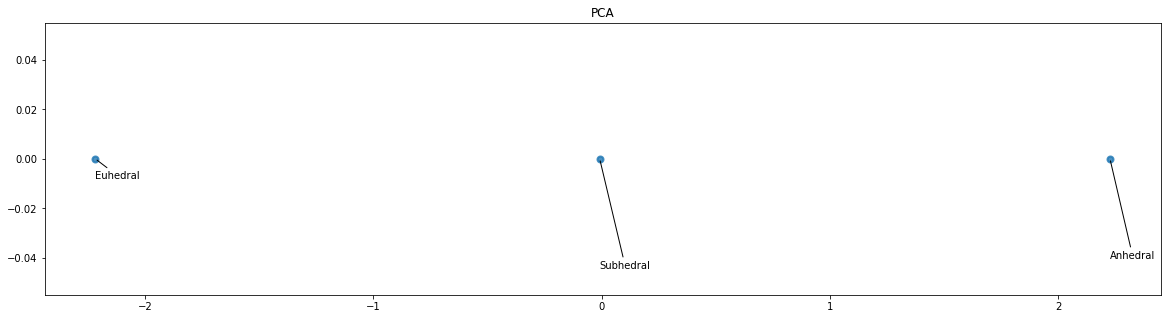

['Komatiite', 'Basalt', 'Andesite', 'Rhyolite']


(4, 2)

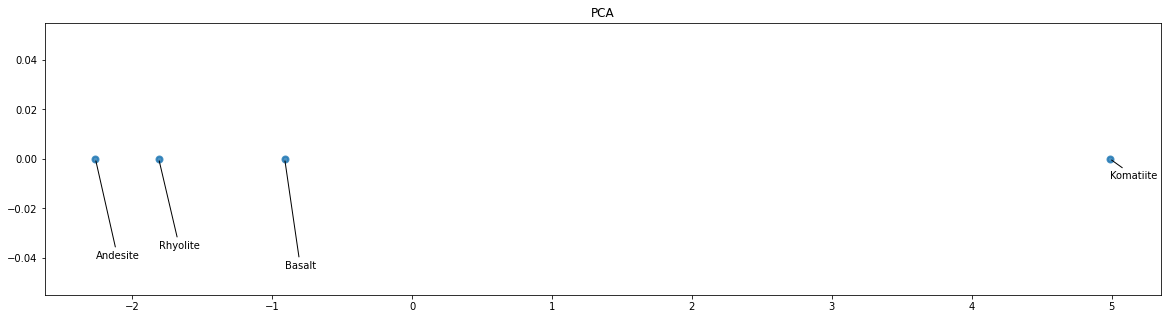

['Lherzolite', 'Harzburgite', 'Dunite']


(3, 2)

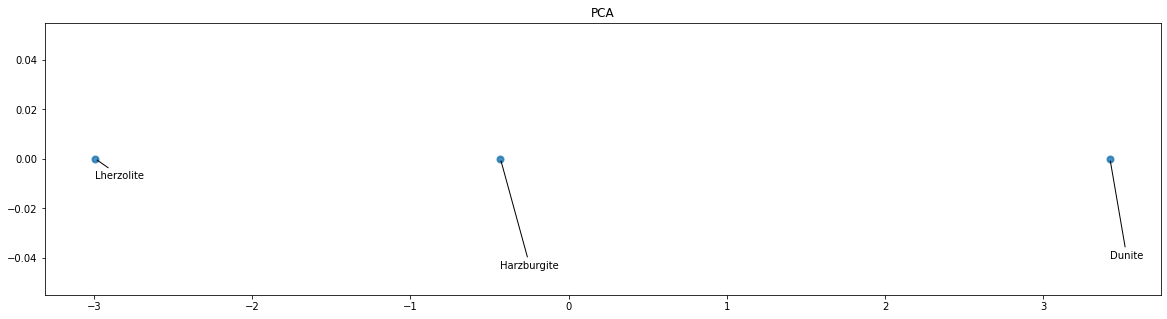

['Olivine', 'Pyroxene', 'Amphibole ', 'Biotite', 'Anorthite', 'Albite', 'Orthoclase', 'Muscovite', 'Quartz']


(8, 2)

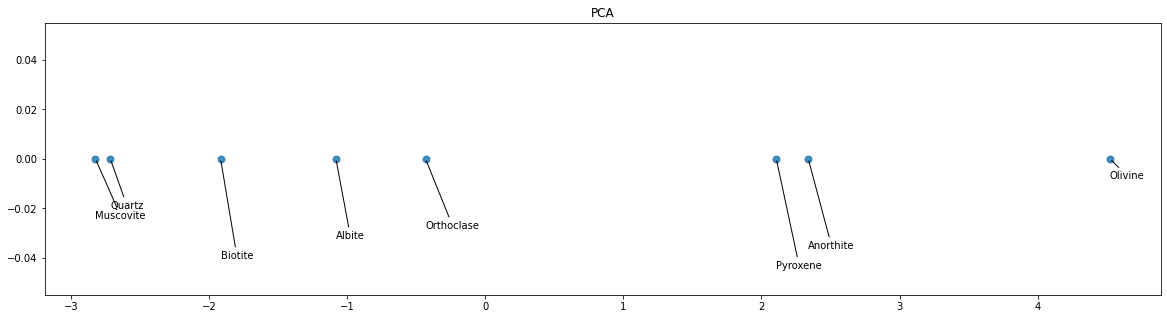

['Peridotite', 'Gabbro', 'Diorite', 'Granite']


(4, 2)

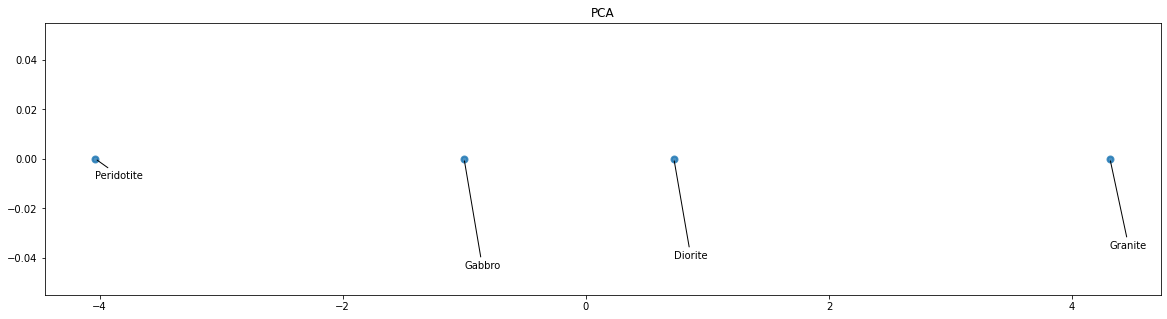

['Ultramafic ', 'Mafic', 'Intermediate', 'Felsic']


(3, 2)

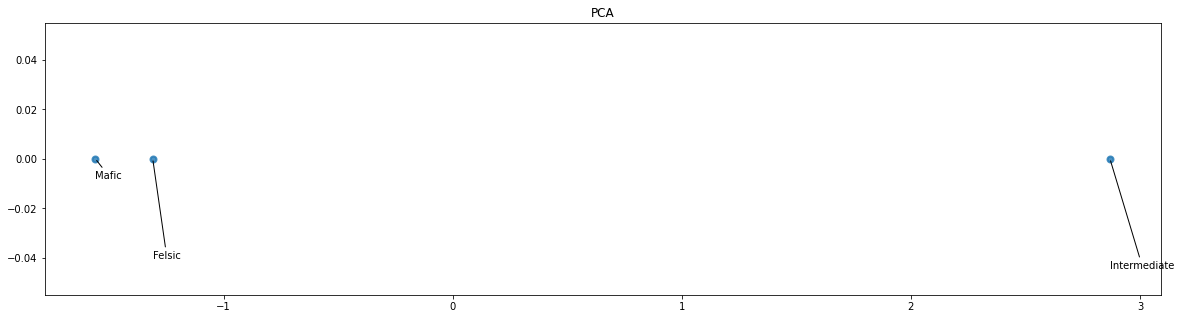

['Greenschist', 'Amphibolite', 'Granulite']


(3, 2)

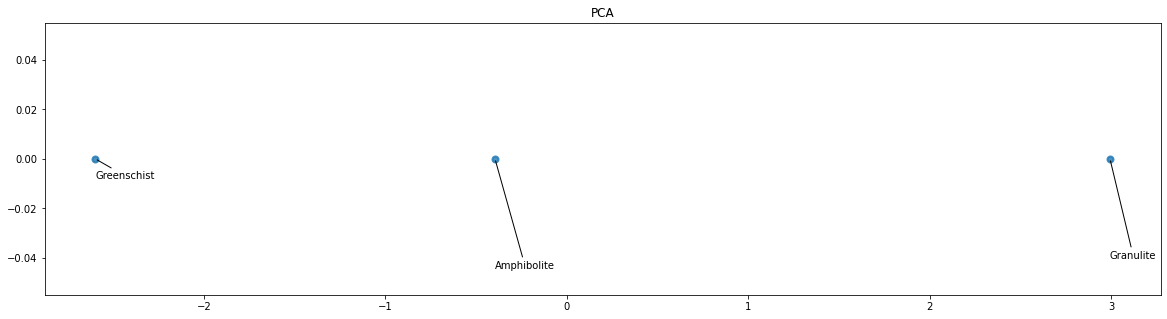

['Slate', 'Phyllite', 'Schist']


(3, 2)

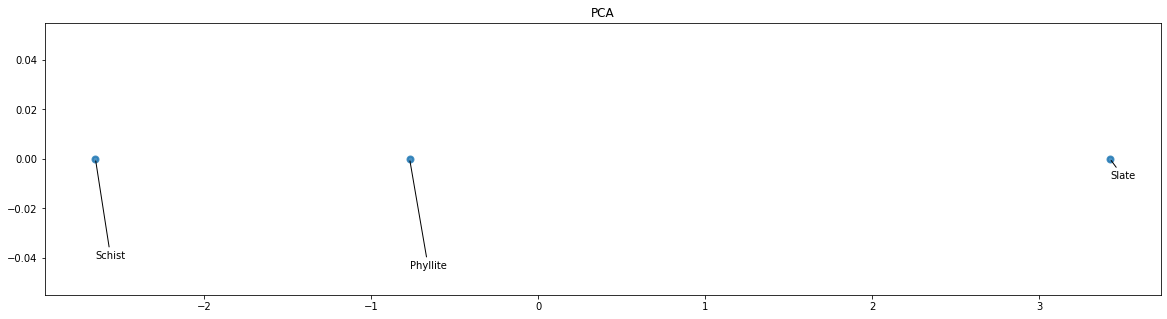

['Angular', 'Subangular', 'Subrounded', 'Rounded']


(4, 2)

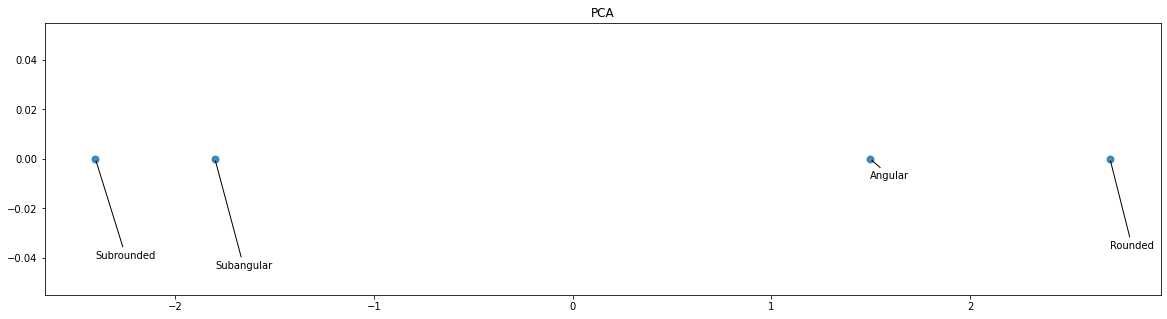

['Boulder', 'Cobble', 'Pebble', 'Sand', 'Silt', 'Clay']


(6, 2)

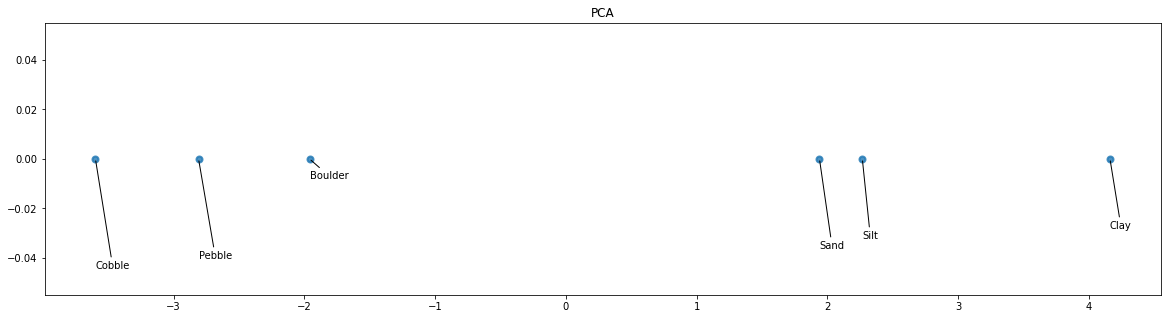

['Conglomerate', 'Sandstone', 'Siltstone', 'Mudstone']


(4, 2)

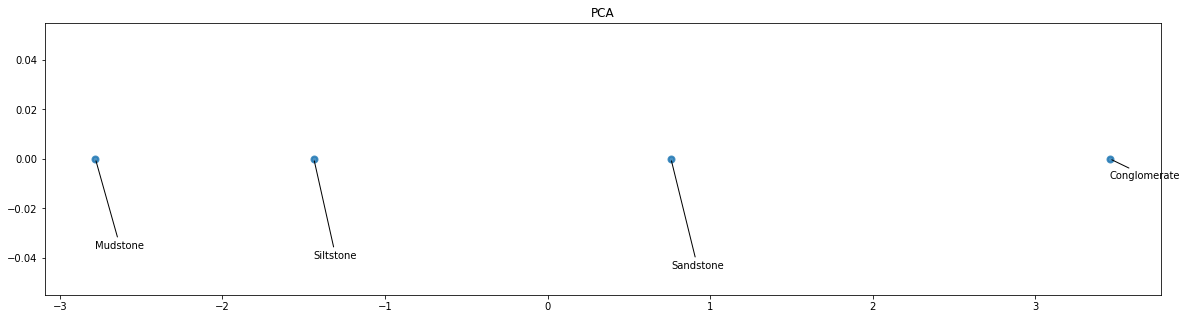

['Supergroup', 'Group', 'Subgroup', 'Formation', 'Member', 'Bed']


(6, 2)

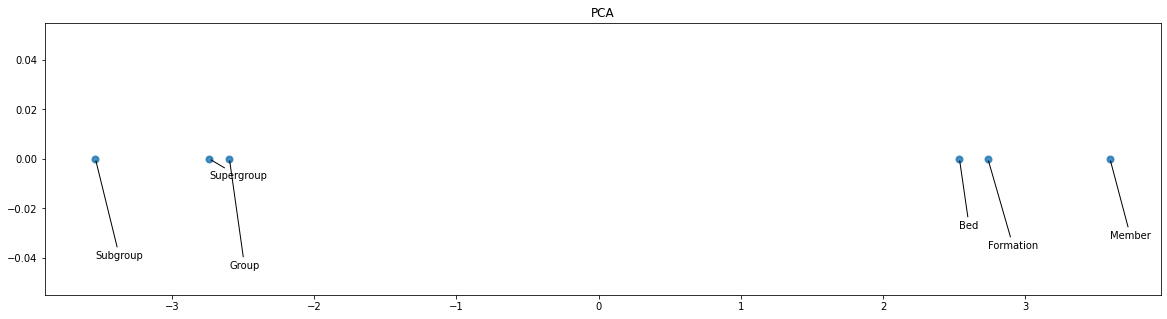

In [71]:
for l in relatedness_gradients:
    print(l)
    show_pca_plot(l, DIMS=1)

['Hadean', 'Archean', 'Proterozoic', 'Phanerozoic']


(4, 2)

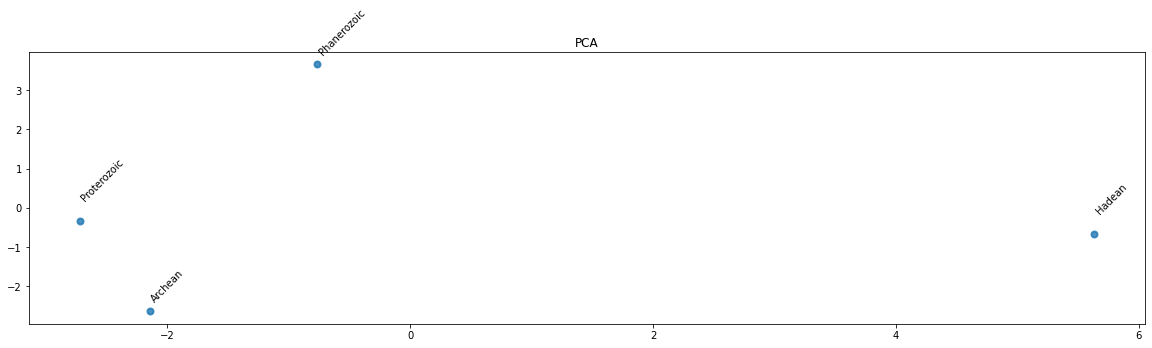

['Eoarchean', 'Paleoarchean', 'Mesoarchean', 'Neoarchean', 'Paleoproterozoic', 'Mesoproterozoic', 'Neoproterozoic', 'Cambrian', 'Ordovician', 'Silurian', 'Devonian', 'Carboniferous', 'Permian', 'Triassic', 'Jurassic', 'Cretaceous', 'Paleogene', 'Neogene']


(18, 2)

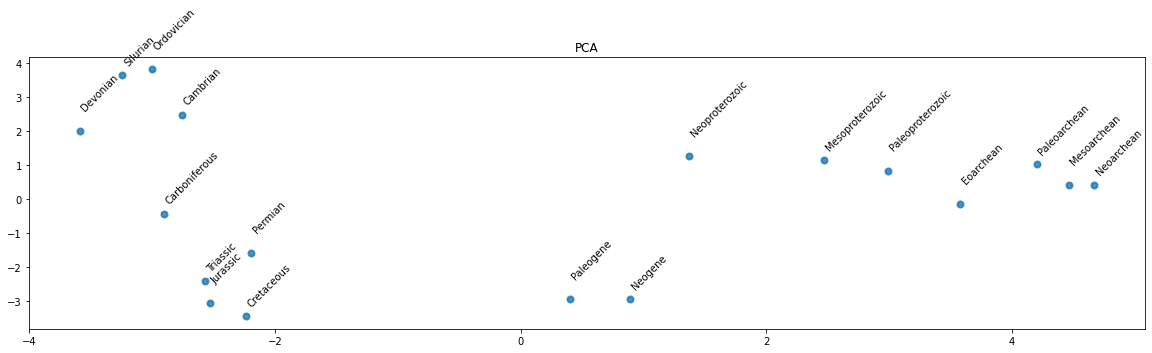

['Albite', 'Oligoclase', 'Andesine', 'Labradorite', 'Bytownite', 'Anorthite']


(6, 2)

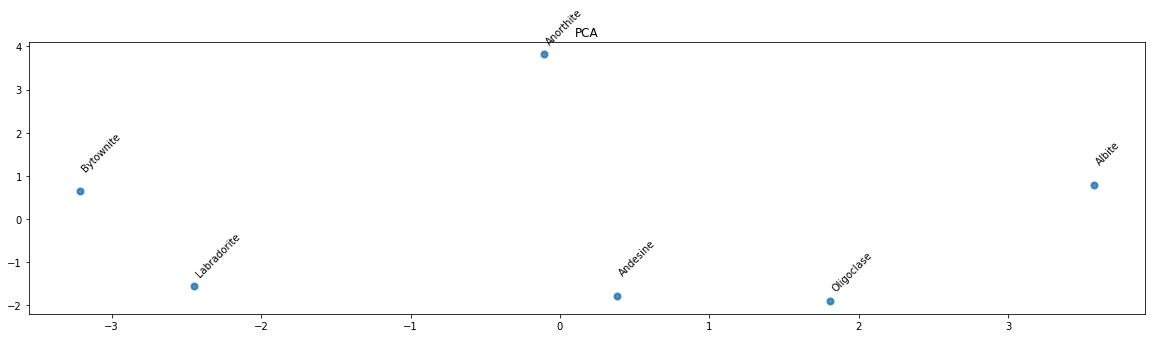

['Euhedral', 'Subhedral', 'Anhedral']


(3, 2)

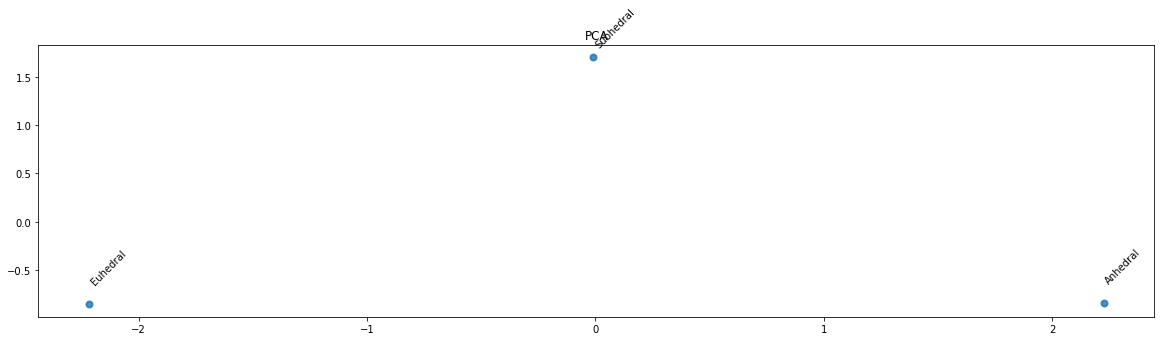

['Komatiite', 'Basalt', 'Andesite', 'Rhyolite']


(4, 2)

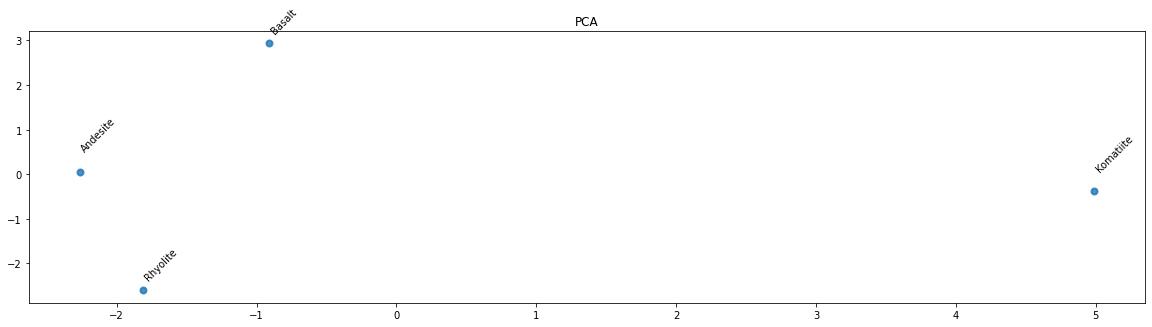

['Lherzolite', 'Harzburgite', 'Dunite']


(3, 2)

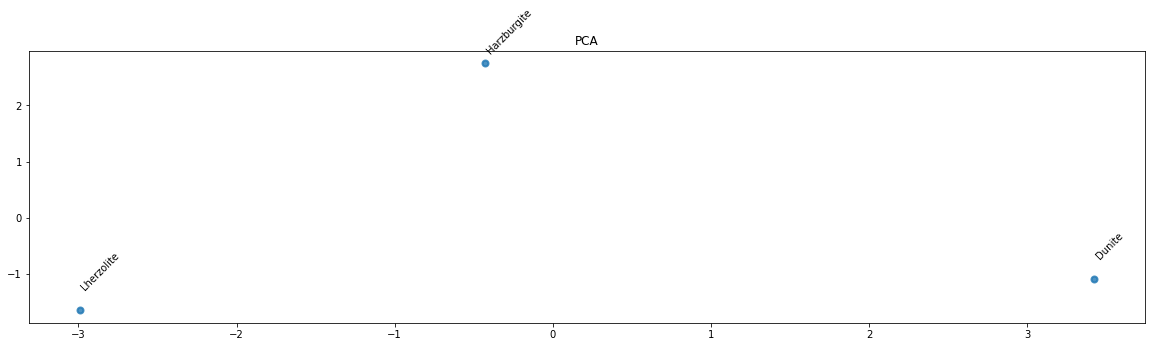

['Olivine', 'Pyroxene', 'Amphibole ', 'Biotite', 'Anorthite', 'Albite', 'Orthoclase', 'Muscovite', 'Quartz']


(8, 2)

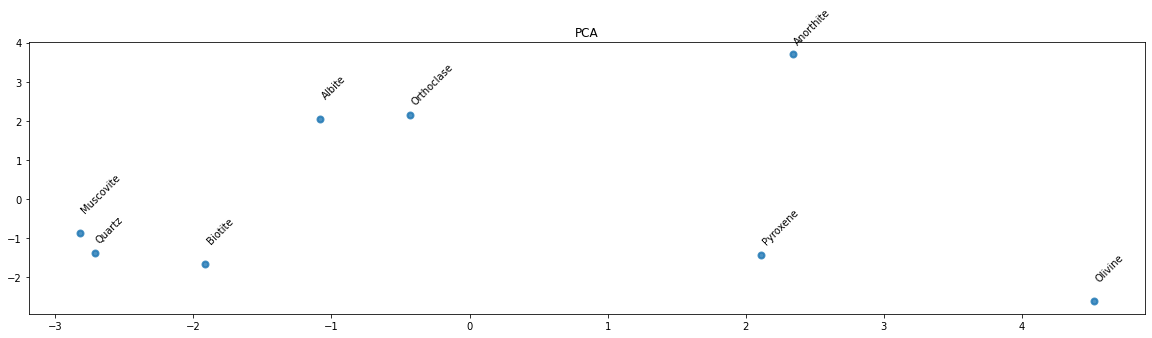

['Peridotite', 'Gabbro', 'Diorite', 'Granite']


(4, 2)

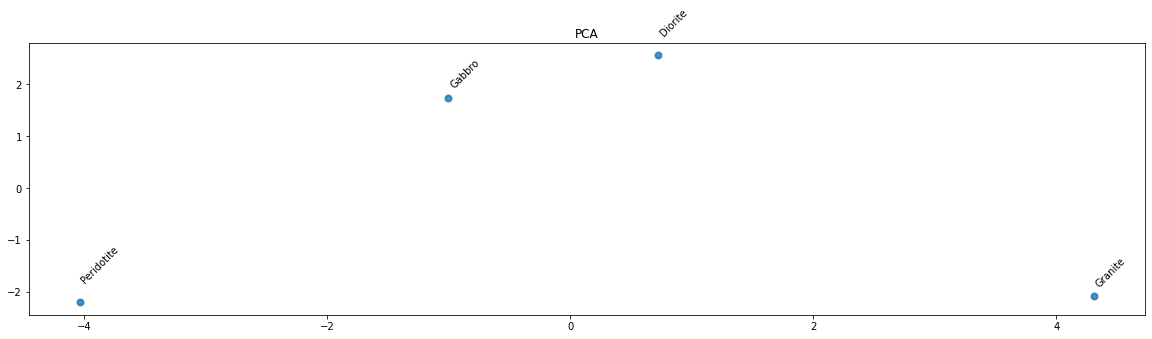

['Ultramafic ', 'Mafic', 'Intermediate', 'Felsic']


(3, 2)

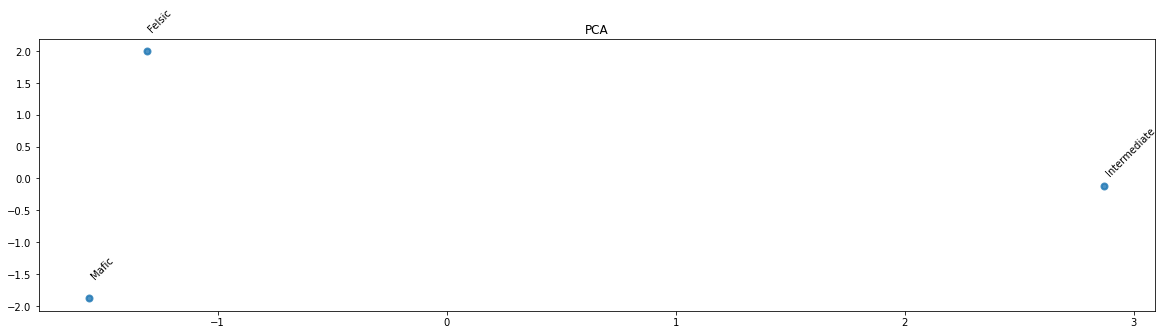

['Greenschist', 'Amphibolite', 'Granulite']


(3, 2)

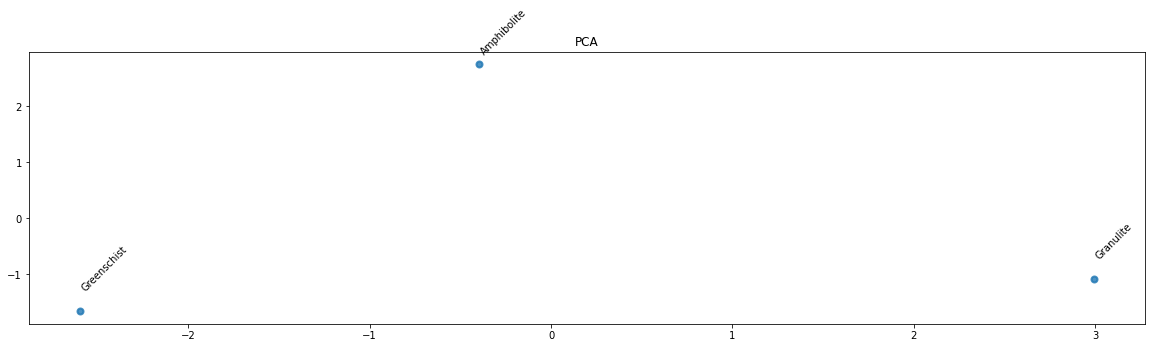

['Slate', 'Phyllite', 'Schist']


(3, 2)

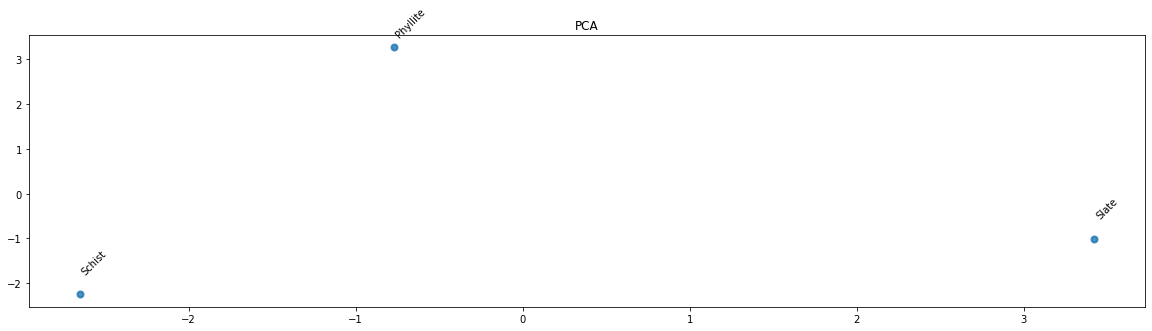

['Angular', 'Subangular', 'Subrounded', 'Rounded']


(4, 2)

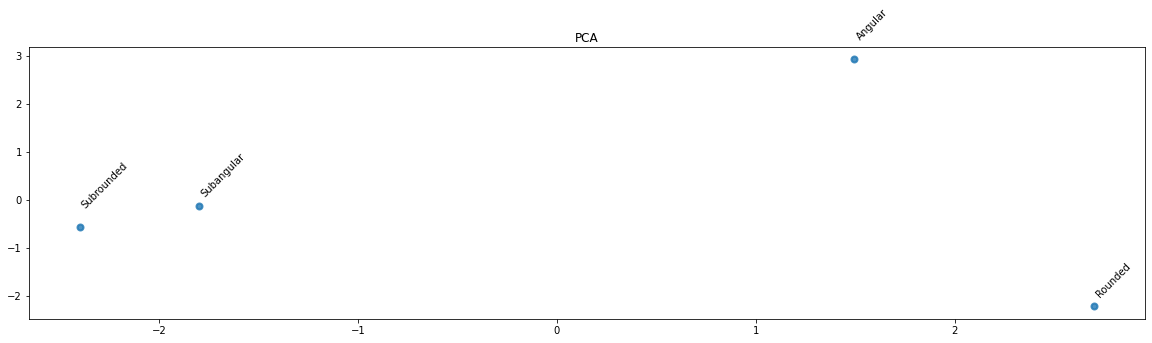

['Boulder', 'Cobble', 'Pebble', 'Sand', 'Silt', 'Clay']


(6, 2)

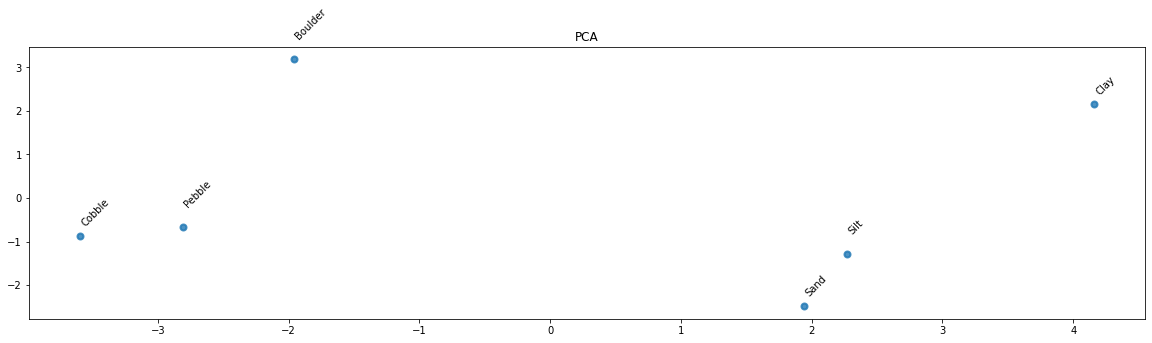

['Conglomerate', 'Sandstone', 'Siltstone', 'Mudstone']


(4, 2)

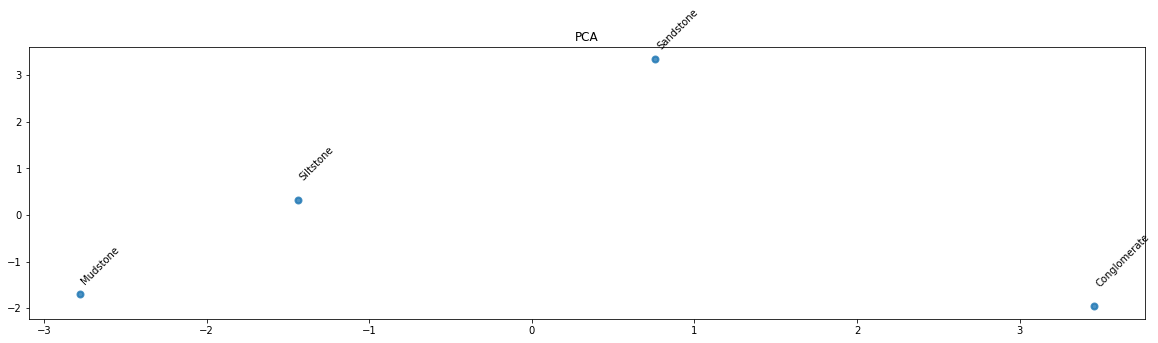

['Supergroup', 'Group', 'Subgroup', 'Formation', 'Member', 'Bed']


(6, 2)

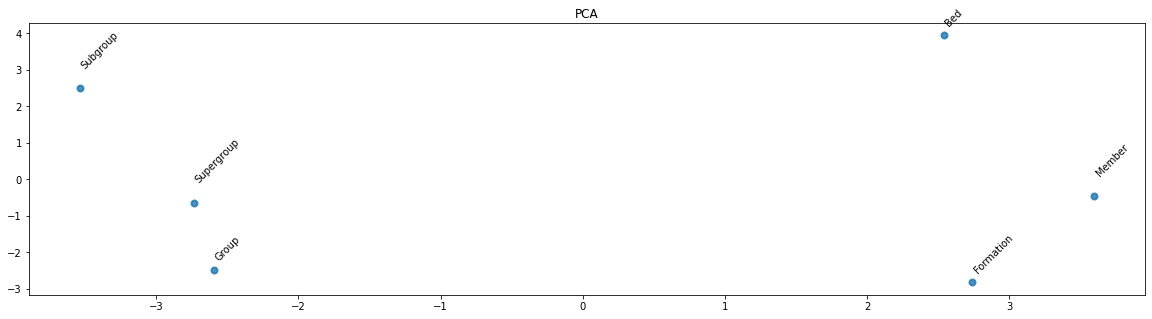

In [72]:
for l in relatedness_gradients:
    print(l)
    show_pca_plot(l, DIMS=2)
